# Body signal of smoking

## 1. Data Preprocessing

#### 1.1 Importing packages and modules

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

import time

#### 1.2 데이터 불러오기

In [7]:
smoking = pd.read_csv('../data/Smoking_raw/smoking.csv')
pd.set_option('display.max_columns',30)
smoking.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


#### 1.3 전처리 함수 생성

In [12]:
def preprocessing(df_scaling):
    # Remove columns not necessary
    if 'ID' in df_scaling:
        df_scaling = df_scaling.drop("ID", axis = 1)
        if len(df_scaling.columns) == 1:
            return df_scaling
        
        # Oral(=구강검사 여부) 특성값은 모두 Y 값이므로 삭제.
        df_scaling = df_scaling.drop('oral', axis = 1) 
        
        # Categorical features label encoding
        cate_features = df_scaling[['gender','tartar']]

        lbe = LabelEncoder()
        lbe.fit_transform(df_scaling["gender"])
        df_scaling["gender"] = lbe.fit_transform(df_scaling["gender"])

        lbe.fit_transform(df_scaling["tartar"])
        df_scaling["tartar"] = lbe.fit_transform(df_scaling["tartar"])
        
        # Urine protein categorizing
        x = df_scaling['Urine protein']
        for i in range(len(x)):
            if(x[i] == 1.0):
                x[i] = 0
            elif(x[i] == 2.0):
                x[i] = 1
            else:
                x[i] = 2
        df_scaling['Urine protein'] = x
        
        # hearing feature converting values 1, 2 => 1, 0
        df_scaling['hearing(left)'] = df_scaling['hearing(left)'].apply(lambda x: x-2 if x == 2.0 else x )
        df_scaling['hearing(right)'] = df_scaling['hearing(right)'].apply(lambda x: x-2 if x == 2.0 else x )
        
        # BMI 지수 계산 : bmi = kg/m^2
        df_scaling['bmi'] = df_scaling['weight(kg)']/((df_scaling['height(cm)']*0.01)**2)
        # wwi(비만 지수) 지수 계산 : wwi = cm/sqrt(kg)
        df_scaling['wwi'] = df_scaling['waist(cm)']/(df_scaling['weight(kg)'].apply(np.sqrt))

    return df_scaling

In [13]:
df = preprocessing(smoking)
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking,bmi,wwi
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,0.0,0.7,18.0,19.0,27.0,0,1,0,24.973985,10.495785
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,0.0,0.6,22.0,19.0,18.0,0,1,0,23.437500,10.457055
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,0.0,1.0,21.0,16.0,22.0,0,0,1,20.761246,10.327956
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,0.0,1.0,19.0,26.0,18.0,0,1,0,25.711662,10.518012
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,0.0,0.6,16.0,14.0,22.0,0,0,0,24.973985,11.102552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3,0.0,0.6,14.0,7.0,10.0,1,1,0,22.491349,9.302605
55688,0,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,0.0,0.9,20.0,12.0,14.0,0,1,0,19.531250,9.899495
55689,0,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,0.0,0.5,17.0,11.0,12.0,0,0,0,19.531250,9.687363
55690,1,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,0.0,0.7,20.0,19.0,18.0,0,0,0,22.038567,10.069757


**Competition Format**

In [14]:
# competition_format
x_train = pd.read_csv('../data/Smoking_raw/competition_format/x_train.csv')
x_test = pd.read_csv('../data/Smoking_raw/competition_format/x_test.csv')
y_train = pd.read_csv('../data/Smoking_raw/competition_format/y_train.csv')
y_test = pd.read_csv('../data/Smoking_raw/competition_format/y_test.csv')

In [15]:
x_train = preprocessing(x_train)
x_test = preprocessing(x_test)
y_train = preprocessing(y_train) # remove 'ID', 'oral' columns
y_test = preprocessing(y_test) # remove 'ID', 'oral' columns

#### 1.4 Scaler 함수 생성

In [16]:
def scaling(train_data, test_data, scaled_form = 'MinMaxScaler()'):
    # 형태 별 특성 구분
    train_data = preprocessing(train_data)
    test_data = preprocessing(test_data)
    tr_cate_features = train_data[['gender', 'tartar', 'hearing(right)', 'hearing(left)', 'dental caries']]
    tr_scaled_features = train_data.drop(tr_cate_features.columns, axis=1)
    
    ts_cate_features = test_data[['gender', 'tartar', 'hearing(right)', 'hearing(left)', 'dental caries']]
    ts_scaled_features = test_data.drop(ts_cate_features.columns, axis=1)
    
    if scaled_form == 'StandardScaler()':
        # Standard scaler
        scaler = StandardScaler()
        scaler.fit(tr_scaled_features) # 훈련 데이터에 fit() 적용
        
        # 훈련 데이터와 테스트 데이터에 transform()을 통해 변환
        tr_scaled = scaler.transform(tr_scaled_features)
        ts_scaled = scaler.transform(ts_scaled_features)
        
        train_std_scaled = pd.DataFrame(tr_scaled, columns=tr_scaled_features.columns)
        train_std_scaled[tr_cate_features.columns] = tr_cate_features
        
        test_std_scaled = pd.DataFrame(ts_scaled, columns=ts_scaled_features.columns)
        test_std_scaled[ts_cate_features.columns] = ts_cate_features
        
        return train_std_scaled, test_std_scaled
    
    elif scaled_form == 'RobustScaler()':
        # Robust scaler
        scaler = RobustScaler()
        scaler.fit(tr_scaled_features) # 훈련 데이터에 fit() 적용
        
        # 훈련 데이터와 테스트 데이터에 transform()을 통해 변환
        tr_scaled = scaler.transform(tr_scaled_features)
        ts_scaled = scaler.transform(ts_scaled_features)
        
        # 데이터 프레임 형태로 변환
        train_robust_scaled = pd.DataFrame(tr_scaled, columns=tr_scaled_features.columns)
        train_robust_scaled[tr_cate_features.columns] = tr_cate_features
        
        test_robust_scaled = pd.DataFrame(ts_scaled, columns=ts_scaled_features.columns)
        test_robust_scaled[ts_cate_features.columns] = ts_cate_features
        
        return train_robust_scaled, test_robust_scaled
        
    elif scaled_form == 'logScaler' :
        # log scaler
        tr_scaled = np.log1p(tr_scaled_features)
        ts_scaled = np.log1p(ts_scaled_features)
        
        # 데이터 프레임 형태로 변환
        train_log_scaled = pd.DataFrame(tr_scaled, columns = tr_scaled_features.columns)
        train_log_scaled[tr_cate_features.columns] = tr_cate_features
        
        test_log_scaled = pd.DataFrame(ts_scaled,columns = ts_scaled_features.columns)
        test_log_scaled[ts_cate_features.columns] = ts_cate_features 
        
        return train_log_scaled, test_log_scaled
    
    else:
        # MinMax scaler
        scaler = MinMaxScaler()
        scaler.fit(tr_scaled_features) # 훈련 데이터에 fit() 적용
        
        # 훈련 데이터와 테스트 데이터에 transform()을 통해 변환
        tr_scaled = scaler.transform(tr_scaled_features)
        ts_scaled = scaler.transform(ts_scaled_features)
        
        # 데이터 프레임 형태로 변환
        train_mmx_scaled = pd.DataFrame(tr_scaled, columns = tr_scaled_features.columns)
        train_mmx_scaled[tr_cate_features.columns] = tr_cate_features
        
        test_mmx_scaled = pd.DataFrame(ts_scaled,columns = ts_scaled_features.columns)
        test_mmx_scaled[ts_cate_features.columns] = ts_cate_features

        return train_mmx_scaled, test_mmx_scaled

## 2. Light GBM

#### Parameters
- num_iterations : 수행 반복 횟수
    - Default : 100)
    - 학습에 활용될 weak learner의 반복 수
- learning_rate : 학습률
    - Default : 0.1
    - 일반적으로 확습률(learning rate)로 불리우는 파라미터
    - weak learner의 반영 수준을 나타냄
    - 범위는 0 ~ 1로 클 수록 모형의 업데이트 속도는 빨라짐. 클 수록 과적합의 이슈 발생 가능성이 높음
- max_depth : 최대 깊이
    - Default : -1
    - 트리의 최대 깊이를 설정
    - 0을 지정하면 깊이의 제한이 없음
    - 과적합에 가장 민감하게 작용하는 파라미터 중 하나임 (과적합 조절 용도로 사용됨)
    - 범위: 0 ~ ∞
- min_data_in_leaf : 노드 별 leaf 최소 개수
    - Default : 20
    - 최종 leaf node가 되기 위한 최소 레코드 수
    - 과적합 제어용으로 활용
- num_leaves
    - Default : 31
    - 하나의 트리가 가지는 최대 leaf 수
- boosting
    - Default : 'gbdt'
    - 실행하고자 하는 알고리즘 타입 정의
        - gdbt : Gradient Boosting Decision Tree
        - rf : Random Forest
        - dart : Dropouts meet Multiple Additive Regression Trees
        - goss : Gradient-based One-Side Sampling
- bagging_fraction
    - Default : 1.0)
    - 데이터 샘플링 비율
    - 과적합 제어용
- feature_fraction
    - Default 1.0)
    - 개별 트리 학습 시 선택하는 feature 비율
    - 과적합 제어용
- lamda_l2
    - Default : 0
    - L2 Regularization 적용 값
    - feature 개수가 많을 때 적용 검토
    - 클수록 과적합 감소 효과
- lamda_l1
    - Default : 0
    - L1 Regularization 적용 값
    - feature 개수가 많을 때 적용 검토
    - 클수록 과적합 감소 효과
- objective
    - Default : regression
        - regression : 회귀
        - binary : 이진분류
        - multiclass : 다중분류
- early_stopping_round
    - Default : 0
    - 이전 학습 대비 일정 수준 이상의 성능 효과가 없을 시 학습을 중단함
    - 지나친 iteration을 줄이는데 도움이 되기 때문에, 학습 속도를 높일 수 있음
- min_gain_to_split
    - Default : 0
    - 트리를 분기하기 위해 필요한 최소한의 gain
- max_cat_threshold
    - Default : 32
    - 카테고리 그룹을 정의된 수로 합치고 그룹 경계선에서 분기 포인트 searching
    - 카테고리 수가 클 때, 과적합을 방지하는 분기 포인트 searching

### 2.1 분류기 생성

In [15]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from lightgbm import plot_importance # for visualization about features' importance by using plot_importance()
from sklearn.metrics import confusion_matrix, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [43]:
lgbm_clf = LGBMClassifier(n_estimators=200)
evals = [(x_test,y_test)]
lgbm_check = []

start = time.time()

# 학습 : 조기중단 수행(100)
lgbm_clf.fit(x_train,y_train, 
             early_stopping_rounds=100, 
             eval_metric='logloss', 
             eval_set=evals, 
             verbose=True)
                

# 예측
lgbm_pred = lgbm_clf.predict(x_test)
lgbm_pred_probs = lgbm_clf.predict_proba(x_test)[:, 1]
end = time.time()
print("LGBM 수행 시간: {0:.1f} 초 ".format(end - start)) # 0.4 sec
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,lgbm_pred)))

[1]	valid_0's binary_logloss: 0.627336
[2]	valid_0's binary_logloss: 0.601689
[3]	valid_0's binary_logloss: 0.580176
[4]	valid_0's binary_logloss: 0.562208
[5]	valid_0's binary_logloss: 0.5468
[6]	valid_0's binary_logloss: 0.533561
[7]	valid_0's binary_logloss: 0.522246
[8]	valid_0's binary_logloss: 0.512491
[9]	valid_0's binary_logloss: 0.503983
[10]	valid_0's binary_logloss: 0.496711
[11]	valid_0's binary_logloss: 0.490049
[12]	valid_0's binary_logloss: 0.484391
[13]	valid_0's binary_logloss: 0.479341
[14]	valid_0's binary_logloss: 0.474881
[15]	valid_0's binary_logloss: 0.470871
[16]	valid_0's binary_logloss: 0.467545
[17]	valid_0's binary_logloss: 0.464506
[18]	valid_0's binary_logloss: 0.461724
[19]	valid_0's binary_logloss: 0.459204
[20]	valid_0's binary_logloss: 0.45694
[21]	valid_0's binary_logloss: 0.454686
[22]	valid_0's binary_logloss: 0.452763
[23]	valid_0's binary_logloss: 0.450921
[24]	valid_0's binary_logloss: 0.449195
[25]	valid_0's binary_logloss: 0.447727
[26]	valid_0

### 2.2 평가지표 시각화 : 오차행렬, ROC curve

In [44]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [45]:
get_clf_eval(y_test, lgbm_pred, lgbm_pred_probs)

오차 행렬
[[5990 1046]
 [ 854 3249]]
정확도: 0.8294, 정밀도: 0.7565, 재현율: 0.7919,F1: 0.7738, AUC:0.9129


In [48]:
lgbm_check.append([200, accuracy_score(y_test,lgbm_pred), precision_score(y_test,lgbm_pred), recall_score(y_test,lgbm_pred), f1_score(y_test,lgbm_pred), roc_auc_score(y_test,lgbm_pred_probs)])

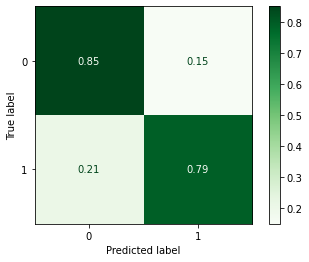

In [49]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lgbm_clf, x_test, y_test, cmap = plt.cm.Greens, normalize = "true")

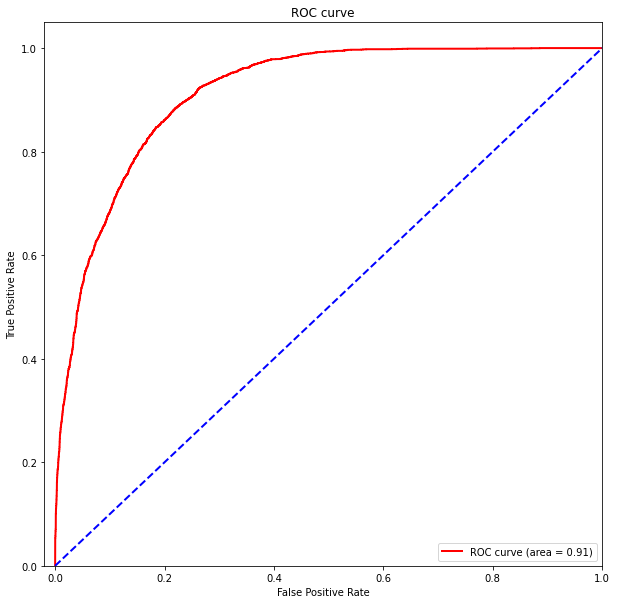

In [50]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test.values, lgbm_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

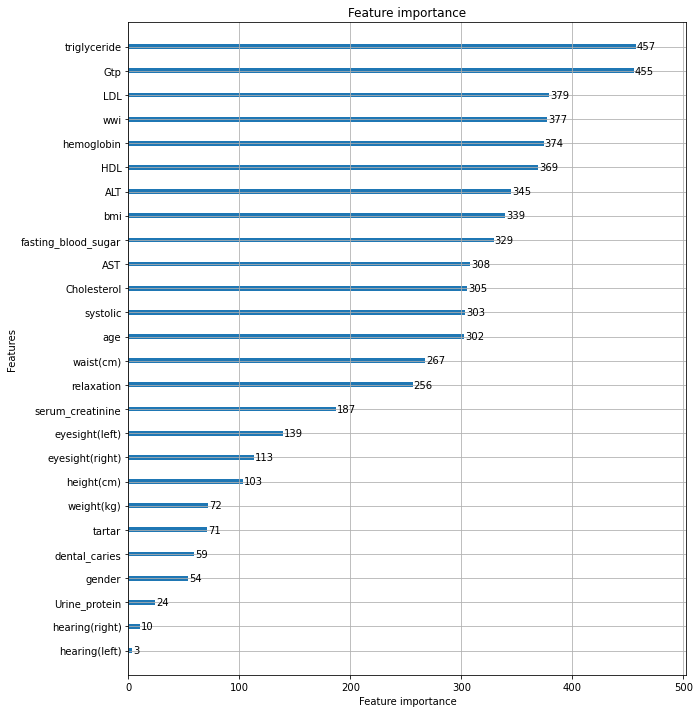

In [51]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_clf, ax=ax,importance_type='split')

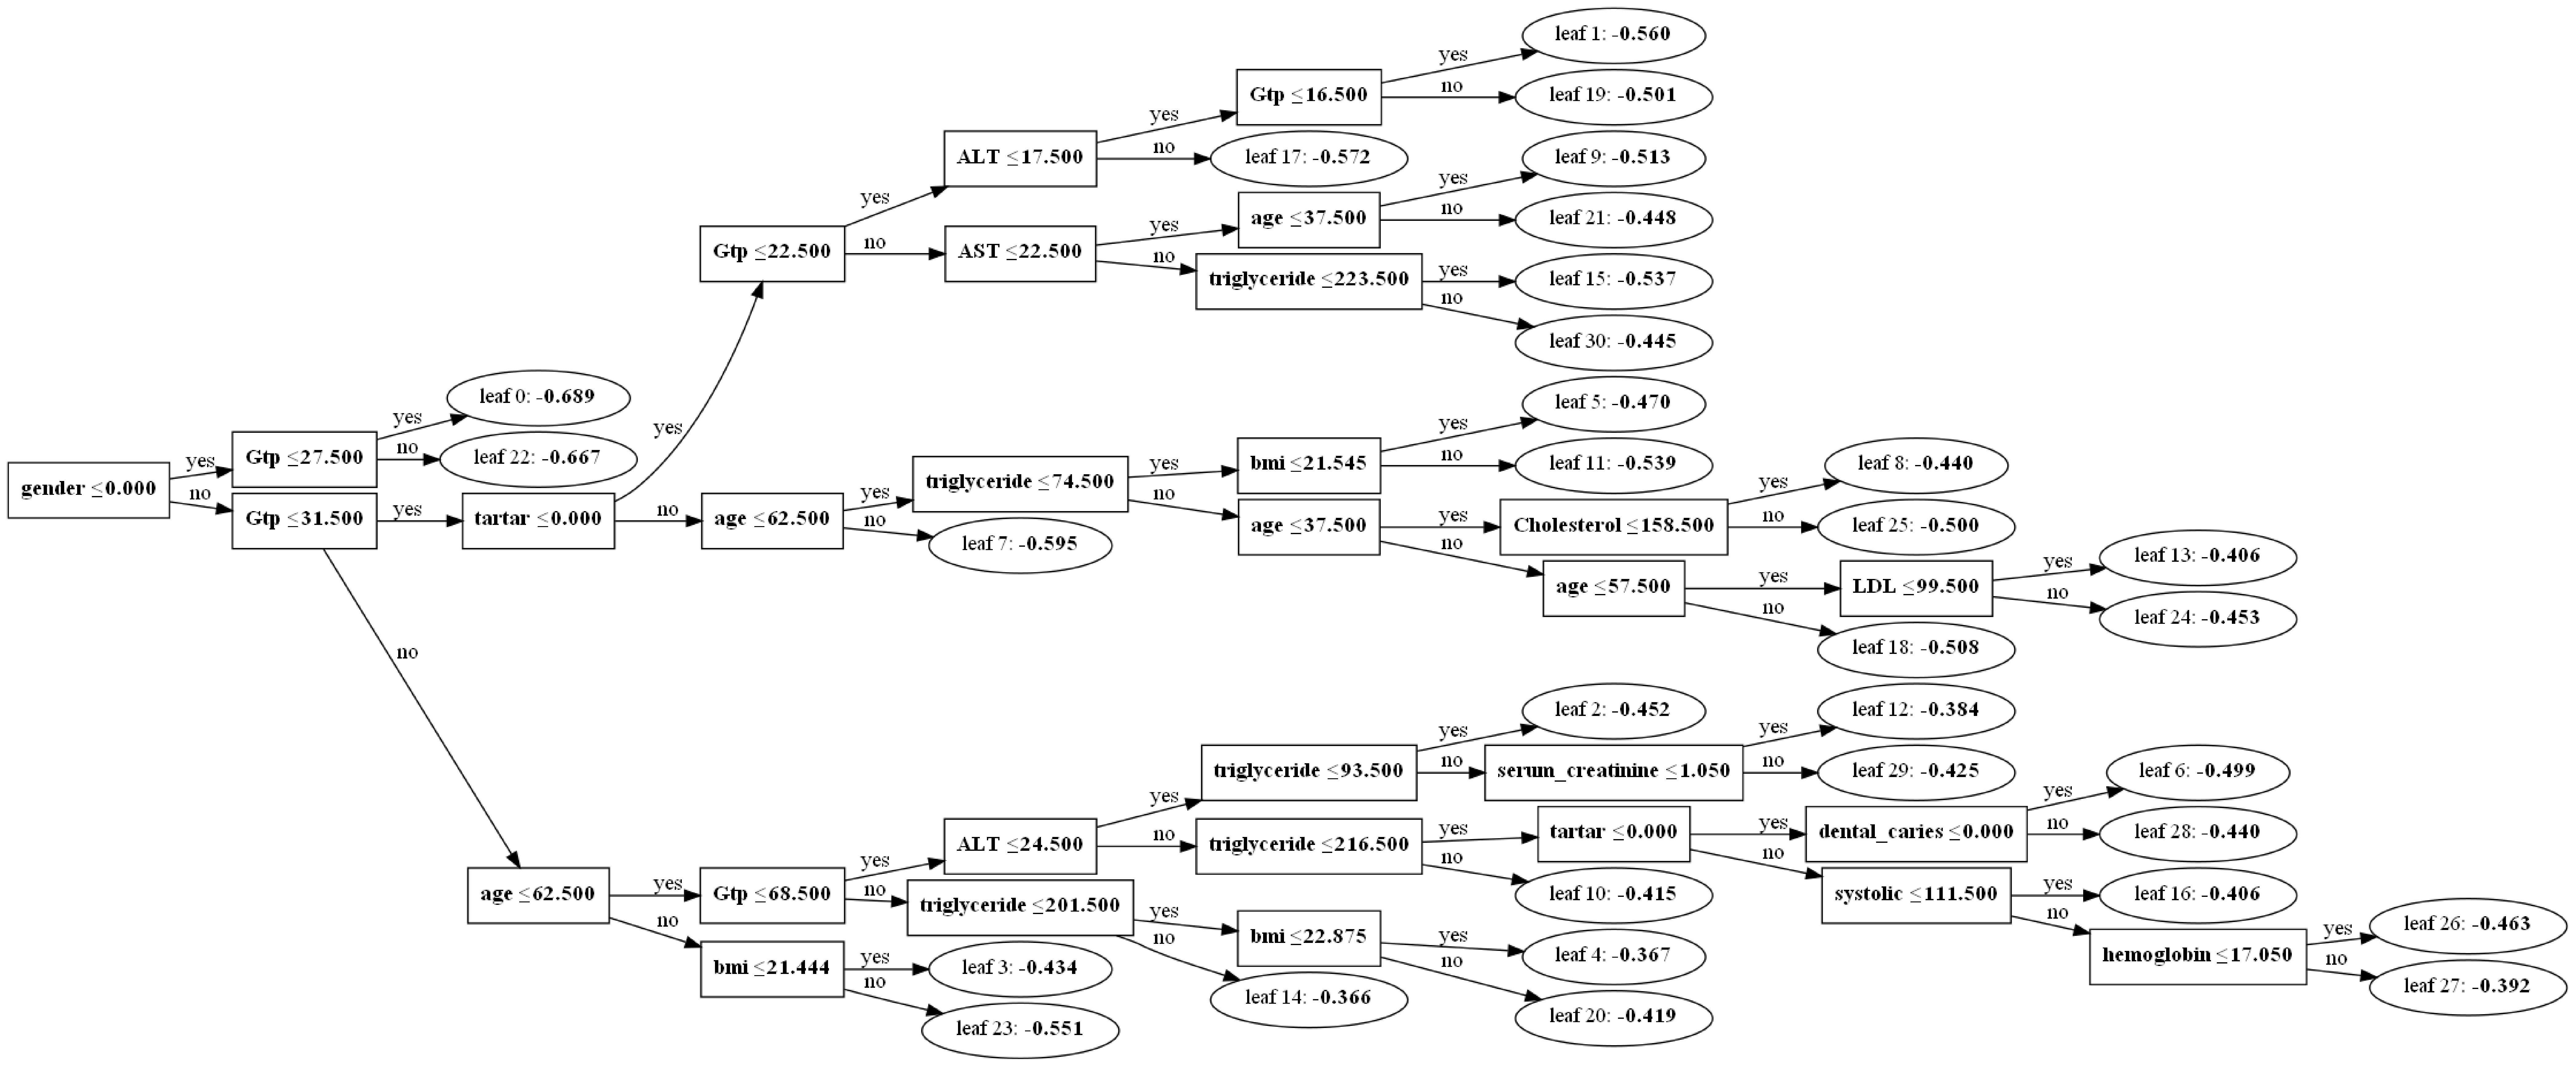

In [52]:
import lightgbm as lgb
lgb.plot_tree(lgbm_clf)

fig = plt.gcf()
fig.set_size_inches(150, 100)

# 이미지 저장하고 싶다면
# fig.savefig('lgbm_tree.png')

plt.show()

#### n_estimators의 수치를 증가

In [53]:
lgbm_clf = LGBMClassifier(n_estimators=600)
evals = [(x_test,y_test)]
start = time.time()

# 학습 : 조기중단 수행(100)
lgbm_clf.fit(x_train,y_train, 
             early_stopping_rounds=100, 
             eval_metric='logloss', 
             eval_set=evals, 
             verbose=True)
                
# 예측
lgbm_pred = lgbm_clf.predict(x_test)
lgbm_pred_probs = lgbm_clf.predict_proba(x_test)[:, 1]
end = time.time()
print("LGBM 수행 시간: {0:.1f} 초 ".format(end - start)) # 1.1 sec
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,lgbm_pred)))

# 평가지표 시각화 : 오차행렬
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test, lgbm_pred, lgbm_pred_probs)
lgbm_check.append([600, accuracy_score(y_test,lgbm_pred), precision_score(y_test,lgbm_pred), recall_score(y_test,lgbm_pred), f1_score(y_test,lgbm_pred), roc_auc_score(y_test,lgbm_pred_probs)])

[1]	valid_0's binary_logloss: 0.627336
[2]	valid_0's binary_logloss: 0.601689
[3]	valid_0's binary_logloss: 0.580176
[4]	valid_0's binary_logloss: 0.562208
[5]	valid_0's binary_logloss: 0.5468
[6]	valid_0's binary_logloss: 0.533561
[7]	valid_0's binary_logloss: 0.522246
[8]	valid_0's binary_logloss: 0.512491
[9]	valid_0's binary_logloss: 0.503983
[10]	valid_0's binary_logloss: 0.496711
[11]	valid_0's binary_logloss: 0.490049
[12]	valid_0's binary_logloss: 0.484391
[13]	valid_0's binary_logloss: 0.479341
[14]	valid_0's binary_logloss: 0.474881
[15]	valid_0's binary_logloss: 0.470871
[16]	valid_0's binary_logloss: 0.467545
[17]	valid_0's binary_logloss: 0.464506
[18]	valid_0's binary_logloss: 0.461724
[19]	valid_0's binary_logloss: 0.459204
[20]	valid_0's binary_logloss: 0.45694
[21]	valid_0's binary_logloss: 0.454686
[22]	valid_0's binary_logloss: 0.452763
[23]	valid_0's binary_logloss: 0.450921
[24]	valid_0's binary_logloss: 0.449195
[25]	valid_0's binary_logloss: 0.447727
[26]	valid_0

[218]	valid_0's binary_logloss: 0.366887
[219]	valid_0's binary_logloss: 0.366645
[220]	valid_0's binary_logloss: 0.366311
[221]	valid_0's binary_logloss: 0.366106
[222]	valid_0's binary_logloss: 0.36575
[223]	valid_0's binary_logloss: 0.365502
[224]	valid_0's binary_logloss: 0.365153
[225]	valid_0's binary_logloss: 0.364991
[226]	valid_0's binary_logloss: 0.364749
[227]	valid_0's binary_logloss: 0.364558
[228]	valid_0's binary_logloss: 0.364371
[229]	valid_0's binary_logloss: 0.364105
[230]	valid_0's binary_logloss: 0.363811
[231]	valid_0's binary_logloss: 0.363584
[232]	valid_0's binary_logloss: 0.363169
[233]	valid_0's binary_logloss: 0.362968
[234]	valid_0's binary_logloss: 0.362699
[235]	valid_0's binary_logloss: 0.362522
[236]	valid_0's binary_logloss: 0.362262
[237]	valid_0's binary_logloss: 0.361994
[238]	valid_0's binary_logloss: 0.361784
[239]	valid_0's binary_logloss: 0.361585
[240]	valid_0's binary_logloss: 0.361168
[241]	valid_0's binary_logloss: 0.360873
[242]	valid_0's b

[505]	valid_0's binary_logloss: 0.299797
[506]	valid_0's binary_logloss: 0.299518
[507]	valid_0's binary_logloss: 0.299247
[508]	valid_0's binary_logloss: 0.298908
[509]	valid_0's binary_logloss: 0.298726
[510]	valid_0's binary_logloss: 0.298622
[511]	valid_0's binary_logloss: 0.298509
[512]	valid_0's binary_logloss: 0.298224
[513]	valid_0's binary_logloss: 0.298035
[514]	valid_0's binary_logloss: 0.297843
[515]	valid_0's binary_logloss: 0.297571
[516]	valid_0's binary_logloss: 0.297432
[517]	valid_0's binary_logloss: 0.297271
[518]	valid_0's binary_logloss: 0.297087
[519]	valid_0's binary_logloss: 0.296907
[520]	valid_0's binary_logloss: 0.296537
[521]	valid_0's binary_logloss: 0.296391
[522]	valid_0's binary_logloss: 0.296193
[523]	valid_0's binary_logloss: 0.295982
[524]	valid_0's binary_logloss: 0.295862
[525]	valid_0's binary_logloss: 0.295749
[526]	valid_0's binary_logloss: 0.295458
[527]	valid_0's binary_logloss: 0.29529
[528]	valid_0's binary_logloss: 0.295142
[529]	valid_0's b

In [54]:
lgbm_clf = LGBMClassifier(n_estimators=700)
evals = [(x_test,y_test)]
start = time.time()

# 학습 : 조기중단 수행(100)
lgbm_clf.fit(x_train,y_train, 
             early_stopping_rounds=100, 
             eval_metric='logloss', 
             eval_set=evals, 
             verbose=True)
                
# 예측
lgbm_pred = lgbm_clf.predict(x_test)
lgbm_pred_probs = lgbm_clf.predict_proba(x_test)[:, 1]
end = time.time()
print("LGBM 수행 시간: {0:.1f} 초 ".format(end - start)) # 1.1 sec
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,lgbm_pred)))

# 평가지표 시각화 : 오차행렬
print(get_clf_eval(y_test, lgbm_pred, lgbm_pred_probs))
lgbm_check.append([700, accuracy_score(y_test,lgbm_pred), precision_score(y_test,lgbm_pred), recall_score(y_test,lgbm_pred), f1_score(y_test,lgbm_pred), roc_auc_score(y_test,lgbm_pred_probs)])

[1]	valid_0's binary_logloss: 0.627336
[2]	valid_0's binary_logloss: 0.601689
[3]	valid_0's binary_logloss: 0.580176
[4]	valid_0's binary_logloss: 0.562208
[5]	valid_0's binary_logloss: 0.5468
[6]	valid_0's binary_logloss: 0.533561
[7]	valid_0's binary_logloss: 0.522246
[8]	valid_0's binary_logloss: 0.512491
[9]	valid_0's binary_logloss: 0.503983
[10]	valid_0's binary_logloss: 0.496711
[11]	valid_0's binary_logloss: 0.490049
[12]	valid_0's binary_logloss: 0.484391
[13]	valid_0's binary_logloss: 0.479341
[14]	valid_0's binary_logloss: 0.474881
[15]	valid_0's binary_logloss: 0.470871
[16]	valid_0's binary_logloss: 0.467545
[17]	valid_0's binary_logloss: 0.464506
[18]	valid_0's binary_logloss: 0.461724
[19]	valid_0's binary_logloss: 0.459204
[20]	valid_0's binary_logloss: 0.45694
[21]	valid_0's binary_logloss: 0.454686
[22]	valid_0's binary_logloss: 0.452763
[23]	valid_0's binary_logloss: 0.450921
[24]	valid_0's binary_logloss: 0.449195
[25]	valid_0's binary_logloss: 0.447727
[26]	valid_0

[209]	valid_0's binary_logloss: 0.369165
[210]	valid_0's binary_logloss: 0.368817
[211]	valid_0's binary_logloss: 0.368637
[212]	valid_0's binary_logloss: 0.36847
[213]	valid_0's binary_logloss: 0.36821
[214]	valid_0's binary_logloss: 0.367959
[215]	valid_0's binary_logloss: 0.367728
[216]	valid_0's binary_logloss: 0.367404
[217]	valid_0's binary_logloss: 0.367142
[218]	valid_0's binary_logloss: 0.366887
[219]	valid_0's binary_logloss: 0.366645
[220]	valid_0's binary_logloss: 0.366311
[221]	valid_0's binary_logloss: 0.366106
[222]	valid_0's binary_logloss: 0.36575
[223]	valid_0's binary_logloss: 0.365502
[224]	valid_0's binary_logloss: 0.365153
[225]	valid_0's binary_logloss: 0.364991
[226]	valid_0's binary_logloss: 0.364749
[227]	valid_0's binary_logloss: 0.364558
[228]	valid_0's binary_logloss: 0.364371
[229]	valid_0's binary_logloss: 0.364105
[230]	valid_0's binary_logloss: 0.363811
[231]	valid_0's binary_logloss: 0.363584
[232]	valid_0's binary_logloss: 0.363169
[233]	valid_0's bin

[461]	valid_0's binary_logloss: 0.309361
[462]	valid_0's binary_logloss: 0.309286
[463]	valid_0's binary_logloss: 0.309033
[464]	valid_0's binary_logloss: 0.3088
[465]	valid_0's binary_logloss: 0.30855
[466]	valid_0's binary_logloss: 0.3083
[467]	valid_0's binary_logloss: 0.308082
[468]	valid_0's binary_logloss: 0.307749
[469]	valid_0's binary_logloss: 0.307539
[470]	valid_0's binary_logloss: 0.307321
[471]	valid_0's binary_logloss: 0.307178
[472]	valid_0's binary_logloss: 0.306957
[473]	valid_0's binary_logloss: 0.306726
[474]	valid_0's binary_logloss: 0.306612
[475]	valid_0's binary_logloss: 0.306366
[476]	valid_0's binary_logloss: 0.305998
[477]	valid_0's binary_logloss: 0.305786
[478]	valid_0's binary_logloss: 0.305477
[479]	valid_0's binary_logloss: 0.305207
[480]	valid_0's binary_logloss: 0.30494
[481]	valid_0's binary_logloss: 0.30474
[482]	valid_0's binary_logloss: 0.304588
[483]	valid_0's binary_logloss: 0.304485
[484]	valid_0's binary_logloss: 0.304354
[485]	valid_0's binary_

LGBM 수행 시간: 1.3 초 
분류 결과 : 0.9 
오차 행렬
[[6518  518]
 [ 395 3708]]
정확도: 0.9180, 정밀도: 0.8774, 재현율: 0.9037,F1: 0.8904, AUC:0.9757
None


In [55]:
lgbm_clf = LGBMClassifier(n_estimators=800)
evals = [(x_test,y_test)]
start = time.time()

# 학습 : 조기중단 수행(100)
lgbm_clf.fit(x_train,y_train, 
             early_stopping_rounds=100, 
             eval_metric='logloss', 
             eval_set=evals, 
             verbose=True)
                
# 예측
lgbm_pred = lgbm_clf.predict(x_test)
lgbm_pred_probs = lgbm_clf.predict_proba(x_test)[:, 1]
end = time.time()
print("LGBM 수행 시간: {0:.1f} 초 ".format(end - start)) # 1.1 sec
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,lgbm_pred)))

# 평가지표 시각화 : 오차행렬, ROC curve
get_clf_eval(y_test, lgbm_pred, lgbm_pred_probs)
lgbm_check.append([800, accuracy_score(y_test,lgbm_pred), precision_score(y_test,lgbm_pred), recall_score(y_test,lgbm_pred), f1_score(y_test,lgbm_pred), roc_auc_score(y_test,lgbm_pred_probs)])

[1]	valid_0's binary_logloss: 0.627336
[2]	valid_0's binary_logloss: 0.601689
[3]	valid_0's binary_logloss: 0.580176
[4]	valid_0's binary_logloss: 0.562208
[5]	valid_0's binary_logloss: 0.5468
[6]	valid_0's binary_logloss: 0.533561
[7]	valid_0's binary_logloss: 0.522246
[8]	valid_0's binary_logloss: 0.512491
[9]	valid_0's binary_logloss: 0.503983
[10]	valid_0's binary_logloss: 0.496711
[11]	valid_0's binary_logloss: 0.490049
[12]	valid_0's binary_logloss: 0.484391
[13]	valid_0's binary_logloss: 0.479341
[14]	valid_0's binary_logloss: 0.474881
[15]	valid_0's binary_logloss: 0.470871
[16]	valid_0's binary_logloss: 0.467545
[17]	valid_0's binary_logloss: 0.464506
[18]	valid_0's binary_logloss: 0.461724
[19]	valid_0's binary_logloss: 0.459204
[20]	valid_0's binary_logloss: 0.45694
[21]	valid_0's binary_logloss: 0.454686
[22]	valid_0's binary_logloss: 0.452763
[23]	valid_0's binary_logloss: 0.450921
[24]	valid_0's binary_logloss: 0.449195
[25]	valid_0's binary_logloss: 0.447727
[26]	valid_0

[315]	valid_0's binary_logloss: 0.341986
[316]	valid_0's binary_logloss: 0.34186
[317]	valid_0's binary_logloss: 0.341751
[318]	valid_0's binary_logloss: 0.341421
[319]	valid_0's binary_logloss: 0.341186
[320]	valid_0's binary_logloss: 0.340941
[321]	valid_0's binary_logloss: 0.340791
[322]	valid_0's binary_logloss: 0.340622
[323]	valid_0's binary_logloss: 0.340403
[324]	valid_0's binary_logloss: 0.340241
[325]	valid_0's binary_logloss: 0.340011
[326]	valid_0's binary_logloss: 0.339809
[327]	valid_0's binary_logloss: 0.339592
[328]	valid_0's binary_logloss: 0.339412
[329]	valid_0's binary_logloss: 0.339219
[330]	valid_0's binary_logloss: 0.339049
[331]	valid_0's binary_logloss: 0.338821
[332]	valid_0's binary_logloss: 0.338639
[333]	valid_0's binary_logloss: 0.338492
[334]	valid_0's binary_logloss: 0.338199
[335]	valid_0's binary_logloss: 0.33784
[336]	valid_0's binary_logloss: 0.337627
[337]	valid_0's binary_logloss: 0.33744
[338]	valid_0's binary_logloss: 0.337172
[339]	valid_0's bin

[538]	valid_0's binary_logloss: 0.293439
[539]	valid_0's binary_logloss: 0.293356
[540]	valid_0's binary_logloss: 0.29312
[541]	valid_0's binary_logloss: 0.292964
[542]	valid_0's binary_logloss: 0.292797
[543]	valid_0's binary_logloss: 0.292739
[544]	valid_0's binary_logloss: 0.292473
[545]	valid_0's binary_logloss: 0.292365
[546]	valid_0's binary_logloss: 0.292129
[547]	valid_0's binary_logloss: 0.291862
[548]	valid_0's binary_logloss: 0.291608
[549]	valid_0's binary_logloss: 0.291369
[550]	valid_0's binary_logloss: 0.291092
[551]	valid_0's binary_logloss: 0.290889
[552]	valid_0's binary_logloss: 0.290713
[553]	valid_0's binary_logloss: 0.290541
[554]	valid_0's binary_logloss: 0.290408
[555]	valid_0's binary_logloss: 0.290258
[556]	valid_0's binary_logloss: 0.290077
[557]	valid_0's binary_logloss: 0.289952
[558]	valid_0's binary_logloss: 0.289809
[559]	valid_0's binary_logloss: 0.28971
[560]	valid_0's binary_logloss: 0.289473
[561]	valid_0's binary_logloss: 0.289238
[562]	valid_0's bi

[768]	valid_0's binary_logloss: 0.252556
[769]	valid_0's binary_logloss: 0.252316
[770]	valid_0's binary_logloss: 0.252132
[771]	valid_0's binary_logloss: 0.251932
[772]	valid_0's binary_logloss: 0.251804
[773]	valid_0's binary_logloss: 0.251627
[774]	valid_0's binary_logloss: 0.251447
[775]	valid_0's binary_logloss: 0.251311
[776]	valid_0's binary_logloss: 0.251203
[777]	valid_0's binary_logloss: 0.251104
[778]	valid_0's binary_logloss: 0.251029
[779]	valid_0's binary_logloss: 0.250884
[780]	valid_0's binary_logloss: 0.250817
[781]	valid_0's binary_logloss: 0.250659
[782]	valid_0's binary_logloss: 0.250528
[783]	valid_0's binary_logloss: 0.250426
[784]	valid_0's binary_logloss: 0.250262
[785]	valid_0's binary_logloss: 0.250041
[786]	valid_0's binary_logloss: 0.249916
[787]	valid_0's binary_logloss: 0.249823
[788]	valid_0's binary_logloss: 0.249537
[789]	valid_0's binary_logloss: 0.249439
[790]	valid_0's binary_logloss: 0.249269
[791]	valid_0's binary_logloss: 0.249041
[792]	valid_0's 

In [56]:
lgbm_clf = LGBMClassifier(n_estimators=900)
evals = [(x_test,y_test)]
start = time.time()

# 학습 : 조기중단 수행(100)
lgbm_clf.fit(x_train,y_train, 
             early_stopping_rounds=100, 
             eval_metric='logloss', 
             eval_set=evals, 
             verbose=True)
                
# 예측
lgbm_pred = lgbm_clf.predict(x_test)
lgbm_pred_probs = lgbm_clf.predict_proba(x_test)[:, 1]
end = time.time()
print("LGBM 수행 시간: {0:.1f} 초 ".format(end - start)) # 1.1 sec
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,lgbm_pred)))

# 평가지표 시각화 : 오차행렬
get_clf_eval(y_test, lgbm_pred, lgbm_pred_probs)
lgbm_check.append([900, accuracy_score(y_test,lgbm_pred), precision_score(y_test,lgbm_pred), recall_score(y_test,lgbm_pred), f1_score(y_test,lgbm_pred), roc_auc_score(y_test,lgbm_pred_probs)])

[1]	valid_0's binary_logloss: 0.627336
[2]	valid_0's binary_logloss: 0.601689
[3]	valid_0's binary_logloss: 0.580176
[4]	valid_0's binary_logloss: 0.562208
[5]	valid_0's binary_logloss: 0.5468
[6]	valid_0's binary_logloss: 0.533561
[7]	valid_0's binary_logloss: 0.522246
[8]	valid_0's binary_logloss: 0.512491
[9]	valid_0's binary_logloss: 0.503983
[10]	valid_0's binary_logloss: 0.496711
[11]	valid_0's binary_logloss: 0.490049
[12]	valid_0's binary_logloss: 0.484391
[13]	valid_0's binary_logloss: 0.479341
[14]	valid_0's binary_logloss: 0.474881
[15]	valid_0's binary_logloss: 0.470871
[16]	valid_0's binary_logloss: 0.467545
[17]	valid_0's binary_logloss: 0.464506
[18]	valid_0's binary_logloss: 0.461724
[19]	valid_0's binary_logloss: 0.459204
[20]	valid_0's binary_logloss: 0.45694
[21]	valid_0's binary_logloss: 0.454686
[22]	valid_0's binary_logloss: 0.452763
[23]	valid_0's binary_logloss: 0.450921
[24]	valid_0's binary_logloss: 0.449195
[25]	valid_0's binary_logloss: 0.447727
[26]	valid_0

[220]	valid_0's binary_logloss: 0.366311
[221]	valid_0's binary_logloss: 0.366106
[222]	valid_0's binary_logloss: 0.36575
[223]	valid_0's binary_logloss: 0.365502
[224]	valid_0's binary_logloss: 0.365153
[225]	valid_0's binary_logloss: 0.364991
[226]	valid_0's binary_logloss: 0.364749
[227]	valid_0's binary_logloss: 0.364558
[228]	valid_0's binary_logloss: 0.364371
[229]	valid_0's binary_logloss: 0.364105
[230]	valid_0's binary_logloss: 0.363811
[231]	valid_0's binary_logloss: 0.363584
[232]	valid_0's binary_logloss: 0.363169
[233]	valid_0's binary_logloss: 0.362968
[234]	valid_0's binary_logloss: 0.362699
[235]	valid_0's binary_logloss: 0.362522
[236]	valid_0's binary_logloss: 0.362262
[237]	valid_0's binary_logloss: 0.361994
[238]	valid_0's binary_logloss: 0.361784
[239]	valid_0's binary_logloss: 0.361585
[240]	valid_0's binary_logloss: 0.361168
[241]	valid_0's binary_logloss: 0.360873
[242]	valid_0's binary_logloss: 0.360531
[243]	valid_0's binary_logloss: 0.360107
[244]	valid_0's b

[491]	valid_0's binary_logloss: 0.302622
[492]	valid_0's binary_logloss: 0.302469
[493]	valid_0's binary_logloss: 0.30231
[494]	valid_0's binary_logloss: 0.302105
[495]	valid_0's binary_logloss: 0.30195
[496]	valid_0's binary_logloss: 0.301805
[497]	valid_0's binary_logloss: 0.301653
[498]	valid_0's binary_logloss: 0.301402
[499]	valid_0's binary_logloss: 0.301318
[500]	valid_0's binary_logloss: 0.301142
[501]	valid_0's binary_logloss: 0.300944
[502]	valid_0's binary_logloss: 0.300707
[503]	valid_0's binary_logloss: 0.300387
[504]	valid_0's binary_logloss: 0.300128
[505]	valid_0's binary_logloss: 0.299797
[506]	valid_0's binary_logloss: 0.299518
[507]	valid_0's binary_logloss: 0.299247
[508]	valid_0's binary_logloss: 0.298908
[509]	valid_0's binary_logloss: 0.298726
[510]	valid_0's binary_logloss: 0.298622
[511]	valid_0's binary_logloss: 0.298509
[512]	valid_0's binary_logloss: 0.298224
[513]	valid_0's binary_logloss: 0.298035
[514]	valid_0's binary_logloss: 0.297843
[515]	valid_0's bi

[751]	valid_0's binary_logloss: 0.255223
[752]	valid_0's binary_logloss: 0.2551
[753]	valid_0's binary_logloss: 0.25484
[754]	valid_0's binary_logloss: 0.254669
[755]	valid_0's binary_logloss: 0.254394
[756]	valid_0's binary_logloss: 0.254285
[757]	valid_0's binary_logloss: 0.254158
[758]	valid_0's binary_logloss: 0.253962
[759]	valid_0's binary_logloss: 0.25389
[760]	valid_0's binary_logloss: 0.253783
[761]	valid_0's binary_logloss: 0.253578
[762]	valid_0's binary_logloss: 0.253462
[763]	valid_0's binary_logloss: 0.253239
[764]	valid_0's binary_logloss: 0.253059
[765]	valid_0's binary_logloss: 0.252938
[766]	valid_0's binary_logloss: 0.252797
[767]	valid_0's binary_logloss: 0.252667
[768]	valid_0's binary_logloss: 0.252556
[769]	valid_0's binary_logloss: 0.252316
[770]	valid_0's binary_logloss: 0.252132
[771]	valid_0's binary_logloss: 0.251932
[772]	valid_0's binary_logloss: 0.251804
[773]	valid_0's binary_logloss: 0.251627
[774]	valid_0's binary_logloss: 0.251447
[775]	valid_0's bina

In [57]:
lgbm_clf = LGBMClassifier(n_estimators=1000)
evals = [(x_test,y_test)]
start = time.time()

# 학습 : 조기중단 수행(100)
lgbm_clf.fit(x_train,y_train, 
             early_stopping_rounds=100, 
             eval_metric='logloss', 
             eval_set=evals, 
             verbose=True)
                
# 예측
lgbm_pred = lgbm_clf.predict(x_test)
lgbm_pred_probs = lgbm_clf.predict_proba(x_test)[:, 1]
end = time.time()
print("LGBM 수행 시간: {0:.1f} 초 ".format(end - start)) # 1.1 sec
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,lgbm_pred)))

# 평가지표 시각화 : 오차행렬
get_clf_eval(y_test, lgbm_pred, lgbm_pred_probs)
lgbm_check.append([1000, accuracy_score(y_test,lgbm_pred), precision_score(y_test,lgbm_pred), recall_score(y_test,lgbm_pred), f1_score(y_test,lgbm_pred), roc_auc_score(y_test,lgbm_pred_probs)])

[1]	valid_0's binary_logloss: 0.627336
[2]	valid_0's binary_logloss: 0.601689
[3]	valid_0's binary_logloss: 0.580176
[4]	valid_0's binary_logloss: 0.562208
[5]	valid_0's binary_logloss: 0.5468
[6]	valid_0's binary_logloss: 0.533561
[7]	valid_0's binary_logloss: 0.522246
[8]	valid_0's binary_logloss: 0.512491
[9]	valid_0's binary_logloss: 0.503983
[10]	valid_0's binary_logloss: 0.496711
[11]	valid_0's binary_logloss: 0.490049
[12]	valid_0's binary_logloss: 0.484391
[13]	valid_0's binary_logloss: 0.479341
[14]	valid_0's binary_logloss: 0.474881
[15]	valid_0's binary_logloss: 0.470871
[16]	valid_0's binary_logloss: 0.467545
[17]	valid_0's binary_logloss: 0.464506
[18]	valid_0's binary_logloss: 0.461724
[19]	valid_0's binary_logloss: 0.459204
[20]	valid_0's binary_logloss: 0.45694
[21]	valid_0's binary_logloss: 0.454686
[22]	valid_0's binary_logloss: 0.452763
[23]	valid_0's binary_logloss: 0.450921
[24]	valid_0's binary_logloss: 0.449195
[25]	valid_0's binary_logloss: 0.447727
[26]	valid_0

[212]	valid_0's binary_logloss: 0.36847
[213]	valid_0's binary_logloss: 0.36821
[214]	valid_0's binary_logloss: 0.367959
[215]	valid_0's binary_logloss: 0.367728
[216]	valid_0's binary_logloss: 0.367404
[217]	valid_0's binary_logloss: 0.367142
[218]	valid_0's binary_logloss: 0.366887
[219]	valid_0's binary_logloss: 0.366645
[220]	valid_0's binary_logloss: 0.366311
[221]	valid_0's binary_logloss: 0.366106
[222]	valid_0's binary_logloss: 0.36575
[223]	valid_0's binary_logloss: 0.365502
[224]	valid_0's binary_logloss: 0.365153
[225]	valid_0's binary_logloss: 0.364991
[226]	valid_0's binary_logloss: 0.364749
[227]	valid_0's binary_logloss: 0.364558
[228]	valid_0's binary_logloss: 0.364371
[229]	valid_0's binary_logloss: 0.364105
[230]	valid_0's binary_logloss: 0.363811
[231]	valid_0's binary_logloss: 0.363584
[232]	valid_0's binary_logloss: 0.363169
[233]	valid_0's binary_logloss: 0.362968
[234]	valid_0's binary_logloss: 0.362699
[235]	valid_0's binary_logloss: 0.362522
[236]	valid_0's bin

[456]	valid_0's binary_logloss: 0.310423
[457]	valid_0's binary_logloss: 0.310208
[458]	valid_0's binary_logloss: 0.30997
[459]	valid_0's binary_logloss: 0.309824
[460]	valid_0's binary_logloss: 0.309633
[461]	valid_0's binary_logloss: 0.309361
[462]	valid_0's binary_logloss: 0.309286
[463]	valid_0's binary_logloss: 0.309033
[464]	valid_0's binary_logloss: 0.3088
[465]	valid_0's binary_logloss: 0.30855
[466]	valid_0's binary_logloss: 0.3083
[467]	valid_0's binary_logloss: 0.308082
[468]	valid_0's binary_logloss: 0.307749
[469]	valid_0's binary_logloss: 0.307539
[470]	valid_0's binary_logloss: 0.307321
[471]	valid_0's binary_logloss: 0.307178
[472]	valid_0's binary_logloss: 0.306957
[473]	valid_0's binary_logloss: 0.306726
[474]	valid_0's binary_logloss: 0.306612
[475]	valid_0's binary_logloss: 0.306366
[476]	valid_0's binary_logloss: 0.305998
[477]	valid_0's binary_logloss: 0.305786
[478]	valid_0's binary_logloss: 0.305477
[479]	valid_0's binary_logloss: 0.305207
[480]	valid_0's binary

[683]	valid_0's binary_logloss: 0.267369
[684]	valid_0's binary_logloss: 0.267207
[685]	valid_0's binary_logloss: 0.267105
[686]	valid_0's binary_logloss: 0.26702
[687]	valid_0's binary_logloss: 0.266818
[688]	valid_0's binary_logloss: 0.266596
[689]	valid_0's binary_logloss: 0.266385
[690]	valid_0's binary_logloss: 0.266117
[691]	valid_0's binary_logloss: 0.26587
[692]	valid_0's binary_logloss: 0.265644
[693]	valid_0's binary_logloss: 0.265492
[694]	valid_0's binary_logloss: 0.265333
[695]	valid_0's binary_logloss: 0.26518
[696]	valid_0's binary_logloss: 0.264969
[697]	valid_0's binary_logloss: 0.264812
[698]	valid_0's binary_logloss: 0.264652
[699]	valid_0's binary_logloss: 0.264467
[700]	valid_0's binary_logloss: 0.26427
[701]	valid_0's binary_logloss: 0.264099
[702]	valid_0's binary_logloss: 0.263924
[703]	valid_0's binary_logloss: 0.263651
[704]	valid_0's binary_logloss: 0.26346
[705]	valid_0's binary_logloss: 0.263341
[706]	valid_0's binary_logloss: 0.263136
[707]	valid_0's binar

[916]	valid_0's binary_logloss: 0.229927
[917]	valid_0's binary_logloss: 0.229821
[918]	valid_0's binary_logloss: 0.229736
[919]	valid_0's binary_logloss: 0.229527
[920]	valid_0's binary_logloss: 0.229346
[921]	valid_0's binary_logloss: 0.229117
[922]	valid_0's binary_logloss: 0.228949
[923]	valid_0's binary_logloss: 0.22881
[924]	valid_0's binary_logloss: 0.228718
[925]	valid_0's binary_logloss: 0.228628
[926]	valid_0's binary_logloss: 0.228546
[927]	valid_0's binary_logloss: 0.228339
[928]	valid_0's binary_logloss: 0.228247
[929]	valid_0's binary_logloss: 0.22809
[930]	valid_0's binary_logloss: 0.228031
[931]	valid_0's binary_logloss: 0.227849
[932]	valid_0's binary_logloss: 0.22767
[933]	valid_0's binary_logloss: 0.227601
[934]	valid_0's binary_logloss: 0.227451
[935]	valid_0's binary_logloss: 0.227389
[936]	valid_0's binary_logloss: 0.227295
[937]	valid_0's binary_logloss: 0.227223
[938]	valid_0's binary_logloss: 0.227053
[939]	valid_0's binary_logloss: 0.22684
[940]	valid_0's bina

In [58]:
lgbm_df = pd.DataFrame(lgbm_check,columns=['n_estimators','accuracy','precision','recall','f1_score','AUC'])
lgbm_df

,n_estimators,accuracy,precision,recall,f1_score,AUC
0,200,0.829428,0.756461,0.791860,0.773756,0.912854
1,600,0.902774,0.857481,0.882769,0.869941,0.967786
2,700,0.918036,0.877425,0.903729,0.890383,0.975674
3,800,0.931681,0.899570,0.916890,0.908147,0.982014
4,900,0.941198,0.915222,0.926152,0.920654,0.986327
5,1000,0.949816,0.925348,0.939556,0.932398,0.989747


### 2.3 Grid Search를 이용하여 최적 하이퍼파라미터 탐색

In [59]:
from sklearn.model_selection import GridSearchCV

# Generate the Light GBM model
lgbm_clf_1 = LGBMClassifier(learning_rate=0.1,n_estimators=1000,
                            subsample=0.8, # 각 트리마다의 관측 데이터 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                            colsample_bytree=0.8, # 각 트리마다의 feature 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                            verbose=10)

# parameter 들을 dictionary 형태로 설정
lgbm_params = {'max_depth':[-1,3,6,9,12], 
               'min_child_samples':[5,10,15],
               'min_child_weight':[1,3,5,7]}

In [ ]:
start = time.time()
# GridSearch를 통해 최적 hyperparameter를 검색
grid_lgbm_clf = GridSearchCV(lgbm_clf_1,lgbm_params,scoring='accuracy',cv=5)
grid_lgbm_clf.fit(x_train, y_train)
print(grid_lgbm_clf.best_params_)
g_lgbm_pred_1 = grid_lgbm_clf.predict(x_test)
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,g_lgbm_pred_1)))
end = time.time()
print("LGBM 수행 시간: {0:.1f} 초 ".format(end - start))

In [23]:
lgbm_clf_2 = LGBMClassifier(n_estimators=1000, 
                              max_depth=12,
                              subsample=0.8, # 각 트리마다의 관측 데이터 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                              colsample_bytree=0.8,
                              min_child_samples=5,
                              min_child_weight=5)
evals = [(x_test,y_test)]
start = time.time()

# 학습 : 조기중단 수행(100)
lgbm_clf_2.fit(x_train,y_train, 
             early_stopping_rounds=100, 
             eval_metric='logloss', 
             eval_set=evals, 
             verbose=True)
                

# 예측
lgbm_pred_2 = lgbm_clf_2.predict(x_test)
lgbm_pred_probs_2 = lgbm_clf_2.predict_proba(x_test)[:, 1]
end = time.time()
print("LGBM 수행 시간: {0:.1f} 초 ".format(end - start)) # 2.3 sec
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,lgbm_pred_2)))

# 평가지표 시각화 : 오차행렬
get_clf_eval(y_test, lgbm_pred_2, lgbm_pred_probs_2)

[1]	valid_0's binary_logloss: 0.627294
[2]	valid_0's binary_logloss: 0.602915
[3]	valid_0's binary_logloss: 0.581337
[4]	valid_0's binary_logloss: 0.566088
[5]	valid_0's binary_logloss: 0.550326
[6]	valid_0's binary_logloss: 0.536597
[7]	valid_0's binary_logloss: 0.524937
[8]	valid_0's binary_logloss: 0.514905
[9]	valid_0's binary_logloss: 0.506271
[10]	valid_0's binary_logloss: 0.498713
[11]	valid_0's binary_logloss: 0.492081
[12]	valid_0's binary_logloss: 0.486099
[13]	valid_0's binary_logloss: 0.480805
[14]	valid_0's binary_logloss: 0.4763
[15]	valid_0's binary_logloss: 0.472342
[16]	valid_0's binary_logloss: 0.469382
[17]	valid_0's binary_logloss: 0.466097
[18]	valid_0's binary_logloss: 0.463135
[19]	valid_0's binary_logloss: 0.460404
[20]	valid_0's binary_logloss: 0.458566
[21]	valid_0's binary_logloss: 0.456367
[22]	valid_0's binary_logloss: 0.454372
[23]	valid_0's binary_logloss: 0.45279
[24]	valid_0's binary_logloss: 0.4511
[25]	valid_0's binary_logloss: 0.449485
[26]	valid_0's

[246]	valid_0's binary_logloss: 0.362502
[247]	valid_0's binary_logloss: 0.362349
[248]	valid_0's binary_logloss: 0.362044
[249]	valid_0's binary_logloss: 0.361779
[250]	valid_0's binary_logloss: 0.361512
[251]	valid_0's binary_logloss: 0.361262
[252]	valid_0's binary_logloss: 0.36108
[253]	valid_0's binary_logloss: 0.360781
[254]	valid_0's binary_logloss: 0.360543
[255]	valid_0's binary_logloss: 0.360306
[256]	valid_0's binary_logloss: 0.360023
[257]	valid_0's binary_logloss: 0.359717
[258]	valid_0's binary_logloss: 0.359483
[259]	valid_0's binary_logloss: 0.359192
[260]	valid_0's binary_logloss: 0.358997
[261]	valid_0's binary_logloss: 0.358749
[262]	valid_0's binary_logloss: 0.358523
[263]	valid_0's binary_logloss: 0.358198
[264]	valid_0's binary_logloss: 0.358042
[265]	valid_0's binary_logloss: 0.357884
[266]	valid_0's binary_logloss: 0.35761
[267]	valid_0's binary_logloss: 0.357335
[268]	valid_0's binary_logloss: 0.357089
[269]	valid_0's binary_logloss: 0.35676
[270]	valid_0's bin

[549]	valid_0's binary_logloss: 0.295717
[550]	valid_0's binary_logloss: 0.295558
[551]	valid_0's binary_logloss: 0.295373
[552]	valid_0's binary_logloss: 0.295196
[553]	valid_0's binary_logloss: 0.294995
[554]	valid_0's binary_logloss: 0.294815
[555]	valid_0's binary_logloss: 0.294602
[556]	valid_0's binary_logloss: 0.29437
[557]	valid_0's binary_logloss: 0.294217
[558]	valid_0's binary_logloss: 0.294089
[559]	valid_0's binary_logloss: 0.293896
[560]	valid_0's binary_logloss: 0.293732
[561]	valid_0's binary_logloss: 0.29357
[562]	valid_0's binary_logloss: 0.293304
[563]	valid_0's binary_logloss: 0.293123
[564]	valid_0's binary_logloss: 0.292898
[565]	valid_0's binary_logloss: 0.292673
[566]	valid_0's binary_logloss: 0.292539
[567]	valid_0's binary_logloss: 0.292287
[568]	valid_0's binary_logloss: 0.292108
[569]	valid_0's binary_logloss: 0.291926
[570]	valid_0's binary_logloss: 0.291794
[571]	valid_0's binary_logloss: 0.291619
[572]	valid_0's binary_logloss: 0.291398
[573]	valid_0's bi

[816]	valid_0's binary_logloss: 0.250573
[817]	valid_0's binary_logloss: 0.250431
[818]	valid_0's binary_logloss: 0.250299
[819]	valid_0's binary_logloss: 0.250145
[820]	valid_0's binary_logloss: 0.249999
[821]	valid_0's binary_logloss: 0.249912
[822]	valid_0's binary_logloss: 0.249725
[823]	valid_0's binary_logloss: 0.249526
[824]	valid_0's binary_logloss: 0.2494
[825]	valid_0's binary_logloss: 0.249216
[826]	valid_0's binary_logloss: 0.249136
[827]	valid_0's binary_logloss: 0.248967
[828]	valid_0's binary_logloss: 0.248776
[829]	valid_0's binary_logloss: 0.248641
[830]	valid_0's binary_logloss: 0.24854
[831]	valid_0's binary_logloss: 0.248305
[832]	valid_0's binary_logloss: 0.248167
[833]	valid_0's binary_logloss: 0.248027
[834]	valid_0's binary_logloss: 0.247876
[835]	valid_0's binary_logloss: 0.247611
[836]	valid_0's binary_logloss: 0.24747
[837]	valid_0's binary_logloss: 0.247222
[838]	valid_0's binary_logloss: 0.247085
[839]	valid_0's binary_logloss: 0.246953
[840]	valid_0's bina

## 3. Scaler 별 결과 비교

In [10]:
std_x_train, std_x_test = scaling(x_train, x_test, 'StandardScaler()')

In [11]:
rbt_x_train, rbt_x_test = scaling(x_train, x_test, 'RobustScaler()')

In [12]:
log_x_train, log_x_test = scaling(x_train, x_test, 'logScaler')

In [13]:
mmx_x_train, mmx_x_test = scaling(x_train, x_test)

In [17]:
lgbm_clf = LGBMClassifier(n_estimators=1000,
                                max_depth=12,
                                min_child_samples=5,
                                min_child_weight=5)
evals = [(x_test,y_test)]
start = time.time()

# 학습 : 조기중단 수행(100)
lgbm_clf.fit(x_train,y_train, 
                early_stopping_rounds=100, 
                eval_metric='logloss', 
                eval_set=evals, 
                verbose=True)
                

# 예측
lgbm_pred = lgbm_clf.predict(x_test)
lgbm_pred_probs = lgbm_clf.predict_proba(x_test)[:, 1]
end = time.time()
print("LGBM 수행 시간: {0:.1f} 초 ".format(end - start)) # 2.3 sec
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,lgbm_pred)))

# 평가지표 시각화 : 오차행렬
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test, lgbm_pred, lgbm_pred_probs)

[1]	valid_0's binary_logloss: 0.627336
[2]	valid_0's binary_logloss: 0.601689
[3]	valid_0's binary_logloss: 0.580176
[4]	valid_0's binary_logloss: 0.562208
[5]	valid_0's binary_logloss: 0.5468
[6]	valid_0's binary_logloss: 0.533561
[7]	valid_0's binary_logloss: 0.522246
[8]	valid_0's binary_logloss: 0.512491
[9]	valid_0's binary_logloss: 0.503983
[10]	valid_0's binary_logloss: 0.496711
[11]	valid_0's binary_logloss: 0.490049
[12]	valid_0's binary_logloss: 0.484391
[13]	valid_0's binary_logloss: 0.479341
[14]	valid_0's binary_logloss: 0.474881
[15]	valid_0's binary_logloss: 0.470871
[16]	valid_0's binary_logloss: 0.467545
[17]	valid_0's binary_logloss: 0.464523
[18]	valid_0's binary_logloss: 0.461741
[19]	valid_0's binary_logloss: 0.459227
[20]	valid_0's binary_logloss: 0.456909
[21]	valid_0's binary_logloss: 0.454855
[22]	valid_0's binary_logloss: 0.452843
[23]	valid_0's binary_logloss: 0.4511
[24]	valid_0's binary_logloss: 0.449319
[25]	valid_0's binary_logloss: 0.447751
[26]	valid_0'

[236]	valid_0's binary_logloss: 0.365408
[237]	valid_0's binary_logloss: 0.365133
[238]	valid_0's binary_logloss: 0.364877
[239]	valid_0's binary_logloss: 0.364604
[240]	valid_0's binary_logloss: 0.364437
[241]	valid_0's binary_logloss: 0.364169
[242]	valid_0's binary_logloss: 0.363792
[243]	valid_0's binary_logloss: 0.363566
[244]	valid_0's binary_logloss: 0.363319
[245]	valid_0's binary_logloss: 0.36304
[246]	valid_0's binary_logloss: 0.362705
[247]	valid_0's binary_logloss: 0.36257
[248]	valid_0's binary_logloss: 0.362267
[249]	valid_0's binary_logloss: 0.362012
[250]	valid_0's binary_logloss: 0.36167
[251]	valid_0's binary_logloss: 0.361437
[252]	valid_0's binary_logloss: 0.361122
[253]	valid_0's binary_logloss: 0.360909
[254]	valid_0's binary_logloss: 0.360584
[255]	valid_0's binary_logloss: 0.360326
[256]	valid_0's binary_logloss: 0.360168
[257]	valid_0's binary_logloss: 0.359869
[258]	valid_0's binary_logloss: 0.35955
[259]	valid_0's binary_logloss: 0.359373
[260]	valid_0's bina

[528]	valid_0's binary_logloss: 0.297808
[529]	valid_0's binary_logloss: 0.297518
[530]	valid_0's binary_logloss: 0.297336
[531]	valid_0's binary_logloss: 0.29721
[532]	valid_0's binary_logloss: 0.297011
[533]	valid_0's binary_logloss: 0.296913
[534]	valid_0's binary_logloss: 0.296684
[535]	valid_0's binary_logloss: 0.29645
[536]	valid_0's binary_logloss: 0.296216
[537]	valid_0's binary_logloss: 0.296041
[538]	valid_0's binary_logloss: 0.295908
[539]	valid_0's binary_logloss: 0.295775
[540]	valid_0's binary_logloss: 0.295554
[541]	valid_0's binary_logloss: 0.295464
[542]	valid_0's binary_logloss: 0.295311
[543]	valid_0's binary_logloss: 0.295109
[544]	valid_0's binary_logloss: 0.294768
[545]	valid_0's binary_logloss: 0.294565
[546]	valid_0's binary_logloss: 0.294354
[547]	valid_0's binary_logloss: 0.294187
[548]	valid_0's binary_logloss: 0.293943
[549]	valid_0's binary_logloss: 0.293761
[550]	valid_0's binary_logloss: 0.293626
[551]	valid_0's binary_logloss: 0.293419
[552]	valid_0's bi

[780]	valid_0's binary_logloss: 0.251153
[781]	valid_0's binary_logloss: 0.251021
[782]	valid_0's binary_logloss: 0.250902
[783]	valid_0's binary_logloss: 0.250632
[784]	valid_0's binary_logloss: 0.250385
[785]	valid_0's binary_logloss: 0.250252
[786]	valid_0's binary_logloss: 0.250138
[787]	valid_0's binary_logloss: 0.249947
[788]	valid_0's binary_logloss: 0.249739
[789]	valid_0's binary_logloss: 0.249596
[790]	valid_0's binary_logloss: 0.249549
[791]	valid_0's binary_logloss: 0.249404
[792]	valid_0's binary_logloss: 0.249251
[793]	valid_0's binary_logloss: 0.249118
[794]	valid_0's binary_logloss: 0.248999
[795]	valid_0's binary_logloss: 0.248786
[796]	valid_0's binary_logloss: 0.248606
[797]	valid_0's binary_logloss: 0.248513
[798]	valid_0's binary_logloss: 0.248283
[799]	valid_0's binary_logloss: 0.248058
[800]	valid_0's binary_logloss: 0.247857
[801]	valid_0's binary_logloss: 0.247615
[802]	valid_0's binary_logloss: 0.247507
[803]	valid_0's binary_logloss: 0.247284
[804]	valid_0's 

LGBM 수행 시간: 1.7 초 
분류 결과 : 1.0 
오차 행렬
[[6733  303]
 [ 231 3872]]
정확도: 0.9521, 정밀도: 0.9274, 재현율: 0.9437,F1: 0.9355, AUC:0.9904


In [18]:
std_lgbm_clf = LGBMClassifier(n_estimators=1000,
                                max_depth=12,
                                min_child_samples=5,
                                min_child_weight=5)
evals = [(std_x_test,y_test)]
start = time.time()

# 학습 : 조기중단 수행(100)
std_lgbm_clf.fit(std_x_train,y_train, 
                early_stopping_rounds=100, 
                eval_metric='logloss', 
                eval_set=evals, 
                verbose=True)
                

# 예측
std_lgbm_pred = std_lgbm_clf.predict(std_x_test)
std_lgbm_pred_probs = std_lgbm_clf.predict_proba(std_x_test)[:, 1]
end = time.time()
print("LGBM 수행 시간: {0:.1f} 초 ".format(end - start)) # 2.3 sec
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,std_lgbm_pred)))

# 평가지표 시각화 : 오차행렬
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test, std_lgbm_pred, std_lgbm_pred_probs)

[1]	valid_0's binary_logloss: 0.627345
[2]	valid_0's binary_logloss: 0.601698
[3]	valid_0's binary_logloss: 0.580185
[4]	valid_0's binary_logloss: 0.562217
[5]	valid_0's binary_logloss: 0.546808
[6]	valid_0's binary_logloss: 0.533569
[7]	valid_0's binary_logloss: 0.522254
[8]	valid_0's binary_logloss: 0.512499
[9]	valid_0's binary_logloss: 0.503991
[10]	valid_0's binary_logloss: 0.496719
[11]	valid_0's binary_logloss: 0.490056
[12]	valid_0's binary_logloss: 0.484398
[13]	valid_0's binary_logloss: 0.479348
[14]	valid_0's binary_logloss: 0.474888
[15]	valid_0's binary_logloss: 0.470878
[16]	valid_0's binary_logloss: 0.46752
[17]	valid_0's binary_logloss: 0.464483
[18]	valid_0's binary_logloss: 0.46169
[19]	valid_0's binary_logloss: 0.459179
[20]	valid_0's binary_logloss: 0.456976
[21]	valid_0's binary_logloss: 0.454783
[22]	valid_0's binary_logloss: 0.452853
[23]	valid_0's binary_logloss: 0.451094
[24]	valid_0's binary_logloss: 0.449619
[25]	valid_0's binary_logloss: 0.447937
[26]	valid_

[204]	valid_0's binary_logloss: 0.371848
[205]	valid_0's binary_logloss: 0.371617
[206]	valid_0's binary_logloss: 0.371389
[207]	valid_0's binary_logloss: 0.371075
[208]	valid_0's binary_logloss: 0.370868
[209]	valid_0's binary_logloss: 0.37052
[210]	valid_0's binary_logloss: 0.370237
[211]	valid_0's binary_logloss: 0.369943
[212]	valid_0's binary_logloss: 0.369504
[213]	valid_0's binary_logloss: 0.369136
[214]	valid_0's binary_logloss: 0.368905
[215]	valid_0's binary_logloss: 0.36859
[216]	valid_0's binary_logloss: 0.368344
[217]	valid_0's binary_logloss: 0.368011
[218]	valid_0's binary_logloss: 0.367742
[219]	valid_0's binary_logloss: 0.367368
[220]	valid_0's binary_logloss: 0.367051
[221]	valid_0's binary_logloss: 0.366762
[222]	valid_0's binary_logloss: 0.366371
[223]	valid_0's binary_logloss: 0.365973
[224]	valid_0's binary_logloss: 0.365782
[225]	valid_0's binary_logloss: 0.365328
[226]	valid_0's binary_logloss: 0.365087
[227]	valid_0's binary_logloss: 0.364839
[228]	valid_0's bi

[428]	valid_0's binary_logloss: 0.31416
[429]	valid_0's binary_logloss: 0.313994
[430]	valid_0's binary_logloss: 0.313774
[431]	valid_0's binary_logloss: 0.313412
[432]	valid_0's binary_logloss: 0.313219
[433]	valid_0's binary_logloss: 0.313105
[434]	valid_0's binary_logloss: 0.312934
[435]	valid_0's binary_logloss: 0.312737
[436]	valid_0's binary_logloss: 0.312504
[437]	valid_0's binary_logloss: 0.312311
[438]	valid_0's binary_logloss: 0.31209
[439]	valid_0's binary_logloss: 0.311903
[440]	valid_0's binary_logloss: 0.311675
[441]	valid_0's binary_logloss: 0.311438
[442]	valid_0's binary_logloss: 0.311207
[443]	valid_0's binary_logloss: 0.310982
[444]	valid_0's binary_logloss: 0.310814
[445]	valid_0's binary_logloss: 0.310565
[446]	valid_0's binary_logloss: 0.310247
[447]	valid_0's binary_logloss: 0.309987
[448]	valid_0's binary_logloss: 0.309768
[449]	valid_0's binary_logloss: 0.309489
[450]	valid_0's binary_logloss: 0.309331
[451]	valid_0's binary_logloss: 0.309153
[452]	valid_0's bi

[664]	valid_0's binary_logloss: 0.268701
[665]	valid_0's binary_logloss: 0.26857
[666]	valid_0's binary_logloss: 0.268395
[667]	valid_0's binary_logloss: 0.268191
[668]	valid_0's binary_logloss: 0.267955
[669]	valid_0's binary_logloss: 0.267847
[670]	valid_0's binary_logloss: 0.267615
[671]	valid_0's binary_logloss: 0.267489
[672]	valid_0's binary_logloss: 0.267361
[673]	valid_0's binary_logloss: 0.267258
[674]	valid_0's binary_logloss: 0.267024
[675]	valid_0's binary_logloss: 0.2668
[676]	valid_0's binary_logloss: 0.266549
[677]	valid_0's binary_logloss: 0.266386
[678]	valid_0's binary_logloss: 0.266174
[679]	valid_0's binary_logloss: 0.265944
[680]	valid_0's binary_logloss: 0.265845
[681]	valid_0's binary_logloss: 0.265661
[682]	valid_0's binary_logloss: 0.265504
[683]	valid_0's binary_logloss: 0.265331
[684]	valid_0's binary_logloss: 0.265214
[685]	valid_0's binary_logloss: 0.265084
[686]	valid_0's binary_logloss: 0.264961
[687]	valid_0's binary_logloss: 0.264767
[688]	valid_0's bin

[918]	valid_0's binary_logloss: 0.228327
[919]	valid_0's binary_logloss: 0.228172
[920]	valid_0's binary_logloss: 0.228072
[921]	valid_0's binary_logloss: 0.227864
[922]	valid_0's binary_logloss: 0.227666
[923]	valid_0's binary_logloss: 0.227579
[924]	valid_0's binary_logloss: 0.227514
[925]	valid_0's binary_logloss: 0.227421
[926]	valid_0's binary_logloss: 0.22726
[927]	valid_0's binary_logloss: 0.227124
[928]	valid_0's binary_logloss: 0.227018
[929]	valid_0's binary_logloss: 0.226905
[930]	valid_0's binary_logloss: 0.22679
[931]	valid_0's binary_logloss: 0.22664
[932]	valid_0's binary_logloss: 0.226465
[933]	valid_0's binary_logloss: 0.226268
[934]	valid_0's binary_logloss: 0.226092
[935]	valid_0's binary_logloss: 0.226002
[936]	valid_0's binary_logloss: 0.225877
[937]	valid_0's binary_logloss: 0.225656
[938]	valid_0's binary_logloss: 0.225566
[939]	valid_0's binary_logloss: 0.225399
[940]	valid_0's binary_logloss: 0.225191
[941]	valid_0's binary_logloss: 0.225077
[942]	valid_0's bin

In [19]:
rbt_lgbm_clf = LGBMClassifier(n_estimators=1000,
                                max_depth=12,
                                min_child_samples=5,
                                min_child_weight=5)
evals = [(rbt_x_test,y_test)]
start = time.time()

# 학습 : 조기중단 수행(100)
rbt_lgbm_clf.fit(rbt_x_train,y_train, 
                early_stopping_rounds=100, 
                eval_metric='logloss', 
                eval_set=evals, 
                verbose=True)
                

# 예측
rbt_lgbm_pred = rbt_lgbm_clf.predict(rbt_x_test)
rbt_lgbm_pred_probs = rbt_lgbm_clf.predict_proba(rbt_x_test)[:, 1]
end = time.time()
print("LGBM 수행 시간: {0:.1f} 초 ".format(end - start)) # 2.3 sec
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,rbt_lgbm_pred)))

# 평가지표 시각화 : 오차행렬
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test, rbt_lgbm_pred, rbt_lgbm_pred_probs)

[1]	valid_0's binary_logloss: 0.627349
[2]	valid_0's binary_logloss: 0.601701
[3]	valid_0's binary_logloss: 0.580188
[4]	valid_0's binary_logloss: 0.56222
[5]	valid_0's binary_logloss: 0.546811
[6]	valid_0's binary_logloss: 0.533572
[7]	valid_0's binary_logloss: 0.522309
[8]	valid_0's binary_logloss: 0.512509
[9]	valid_0's binary_logloss: 0.50399
[10]	valid_0's binary_logloss: 0.496663
[11]	valid_0's binary_logloss: 0.490001
[12]	valid_0's binary_logloss: 0.484413
[13]	valid_0's binary_logloss: 0.479398
[14]	valid_0's binary_logloss: 0.474933
[15]	valid_0's binary_logloss: 0.470957
[16]	valid_0's binary_logloss: 0.467536
[17]	valid_0's binary_logloss: 0.464531
[18]	valid_0's binary_logloss: 0.461816
[19]	valid_0's binary_logloss: 0.459356
[20]	valid_0's binary_logloss: 0.457038
[21]	valid_0's binary_logloss: 0.454933
[22]	valid_0's binary_logloss: 0.453018
[23]	valid_0's binary_logloss: 0.451204
[24]	valid_0's binary_logloss: 0.44945
[25]	valid_0's binary_logloss: 0.448225
[26]	valid_0

[294]	valid_0's binary_logloss: 0.348675
[295]	valid_0's binary_logloss: 0.348394
[296]	valid_0's binary_logloss: 0.348223
[297]	valid_0's binary_logloss: 0.347793
[298]	valid_0's binary_logloss: 0.347488
[299]	valid_0's binary_logloss: 0.347307
[300]	valid_0's binary_logloss: 0.346972
[301]	valid_0's binary_logloss: 0.346672
[302]	valid_0's binary_logloss: 0.346335
[303]	valid_0's binary_logloss: 0.346019
[304]	valid_0's binary_logloss: 0.345709
[305]	valid_0's binary_logloss: 0.345476
[306]	valid_0's binary_logloss: 0.345182
[307]	valid_0's binary_logloss: 0.344997
[308]	valid_0's binary_logloss: 0.344694
[309]	valid_0's binary_logloss: 0.344401
[310]	valid_0's binary_logloss: 0.344099
[311]	valid_0's binary_logloss: 0.343871
[312]	valid_0's binary_logloss: 0.343698
[313]	valid_0's binary_logloss: 0.343441
[314]	valid_0's binary_logloss: 0.343144
[315]	valid_0's binary_logloss: 0.342943
[316]	valid_0's binary_logloss: 0.342607
[317]	valid_0's binary_logloss: 0.342152
[318]	valid_0's 

[539]	valid_0's binary_logloss: 0.293709
[540]	valid_0's binary_logloss: 0.293552
[541]	valid_0's binary_logloss: 0.293291
[542]	valid_0's binary_logloss: 0.29299
[543]	valid_0's binary_logloss: 0.292808
[544]	valid_0's binary_logloss: 0.292533
[545]	valid_0's binary_logloss: 0.29238
[546]	valid_0's binary_logloss: 0.292169
[547]	valid_0's binary_logloss: 0.292055
[548]	valid_0's binary_logloss: 0.291821
[549]	valid_0's binary_logloss: 0.291712
[550]	valid_0's binary_logloss: 0.291497
[551]	valid_0's binary_logloss: 0.291262
[552]	valid_0's binary_logloss: 0.291016
[553]	valid_0's binary_logloss: 0.290776
[554]	valid_0's binary_logloss: 0.290563
[555]	valid_0's binary_logloss: 0.290416
[556]	valid_0's binary_logloss: 0.29013
[557]	valid_0's binary_logloss: 0.289999
[558]	valid_0's binary_logloss: 0.289769
[559]	valid_0's binary_logloss: 0.289555
[560]	valid_0's binary_logloss: 0.289294
[561]	valid_0's binary_logloss: 0.28905
[562]	valid_0's binary_logloss: 0.28888
[563]	valid_0's binar

[782]	valid_0's binary_logloss: 0.248795
[783]	valid_0's binary_logloss: 0.24864
[784]	valid_0's binary_logloss: 0.248491
[785]	valid_0's binary_logloss: 0.248305
[786]	valid_0's binary_logloss: 0.248162
[787]	valid_0's binary_logloss: 0.247984
[788]	valid_0's binary_logloss: 0.247816
[789]	valid_0's binary_logloss: 0.247682
[790]	valid_0's binary_logloss: 0.24753
[791]	valid_0's binary_logloss: 0.247411
[792]	valid_0's binary_logloss: 0.247254
[793]	valid_0's binary_logloss: 0.247123
[794]	valid_0's binary_logloss: 0.246993
[795]	valid_0's binary_logloss: 0.246793
[796]	valid_0's binary_logloss: 0.246554
[797]	valid_0's binary_logloss: 0.246353
[798]	valid_0's binary_logloss: 0.246187
[799]	valid_0's binary_logloss: 0.246085
[800]	valid_0's binary_logloss: 0.245979
[801]	valid_0's binary_logloss: 0.245811
[802]	valid_0's binary_logloss: 0.245711
[803]	valid_0's binary_logloss: 0.245584
[804]	valid_0's binary_logloss: 0.245394
[805]	valid_0's binary_logloss: 0.245249
[806]	valid_0's bi

LGBM 수행 시간: 1.8 초 
분류 결과 : 1.0 
오차 행렬
[[6751  285]
 [ 247 3856]]
정확도: 0.9522, 정밀도: 0.9312, 재현율: 0.9398,F1: 0.9355, AUC:0.9903


In [20]:
mmx_lgbm_clf = LGBMClassifier(n_estimators=1000,
                                max_depth=12,
                                min_child_samples=5,
                                min_child_weight=5)
evals = [(mmx_x_test,y_test)]
start = time.time()

# 학습 : 조기중단 수행(100)
mmx_lgbm_clf.fit(mmx_x_train,y_train, 
                early_stopping_rounds=100, 
                eval_metric='logloss', 
                eval_set=evals, 
                verbose=True)
                

# 예측
mmx_lgbm_pred = mmx_lgbm_clf.predict(mmx_x_test)
mmx_lgbm_pred_probs = mmx_lgbm_clf.predict_proba(mmx_x_test)[:, 1]
end = time.time()
print("LGBM 수행 시간: {0:.1f} 초 ".format(end - start)) # 2.3 sec
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,mmx_lgbm_pred)))

# 평가지표 시각화 : 오차행렬
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test, mmx_lgbm_pred, mmx_lgbm_pred_probs)

[1]	valid_0's binary_logloss: 0.627336
[2]	valid_0's binary_logloss: 0.601689
[3]	valid_0's binary_logloss: 0.580176
[4]	valid_0's binary_logloss: 0.562208
[5]	valid_0's binary_logloss: 0.5468
[6]	valid_0's binary_logloss: 0.533561
[7]	valid_0's binary_logloss: 0.522246
[8]	valid_0's binary_logloss: 0.512491
[9]	valid_0's binary_logloss: 0.503983
[10]	valid_0's binary_logloss: 0.496711
[11]	valid_0's binary_logloss: 0.490049
[12]	valid_0's binary_logloss: 0.484391
[13]	valid_0's binary_logloss: 0.479341
[14]	valid_0's binary_logloss: 0.474881
[15]	valid_0's binary_logloss: 0.470871
[16]	valid_0's binary_logloss: 0.467545
[17]	valid_0's binary_logloss: 0.464523
[18]	valid_0's binary_logloss: 0.461741
[19]	valid_0's binary_logloss: 0.459227
[20]	valid_0's binary_logloss: 0.456909
[21]	valid_0's binary_logloss: 0.454855
[22]	valid_0's binary_logloss: 0.452843
[23]	valid_0's binary_logloss: 0.4511
[24]	valid_0's binary_logloss: 0.449319
[25]	valid_0's binary_logloss: 0.447751
[26]	valid_0'

[229]	valid_0's binary_logloss: 0.365448
[230]	valid_0's binary_logloss: 0.365113
[231]	valid_0's binary_logloss: 0.364766
[232]	valid_0's binary_logloss: 0.364515
[233]	valid_0's binary_logloss: 0.364181
[234]	valid_0's binary_logloss: 0.363897
[235]	valid_0's binary_logloss: 0.363625
[236]	valid_0's binary_logloss: 0.363359
[237]	valid_0's binary_logloss: 0.363125
[238]	valid_0's binary_logloss: 0.362852
[239]	valid_0's binary_logloss: 0.36252
[240]	valid_0's binary_logloss: 0.362182
[241]	valid_0's binary_logloss: 0.361854
[242]	valid_0's binary_logloss: 0.36162
[243]	valid_0's binary_logloss: 0.361387
[244]	valid_0's binary_logloss: 0.361195
[245]	valid_0's binary_logloss: 0.361042
[246]	valid_0's binary_logloss: 0.360731
[247]	valid_0's binary_logloss: 0.360599
[248]	valid_0's binary_logloss: 0.36036
[249]	valid_0's binary_logloss: 0.360196
[250]	valid_0's binary_logloss: 0.359924
[251]	valid_0's binary_logloss: 0.359761
[252]	valid_0's binary_logloss: 0.359394
[253]	valid_0's bin

[479]	valid_0's binary_logloss: 0.306392
[480]	valid_0's binary_logloss: 0.306137
[481]	valid_0's binary_logloss: 0.306
[482]	valid_0's binary_logloss: 0.305716
[483]	valid_0's binary_logloss: 0.305527
[484]	valid_0's binary_logloss: 0.305253
[485]	valid_0's binary_logloss: 0.305122
[486]	valid_0's binary_logloss: 0.30488
[487]	valid_0's binary_logloss: 0.304664
[488]	valid_0's binary_logloss: 0.304463
[489]	valid_0's binary_logloss: 0.304278
[490]	valid_0's binary_logloss: 0.304111
[491]	valid_0's binary_logloss: 0.303852
[492]	valid_0's binary_logloss: 0.303708
[493]	valid_0's binary_logloss: 0.303536
[494]	valid_0's binary_logloss: 0.303367
[495]	valid_0's binary_logloss: 0.30309
[496]	valid_0's binary_logloss: 0.302925
[497]	valid_0's binary_logloss: 0.302726
[498]	valid_0's binary_logloss: 0.302408
[499]	valid_0's binary_logloss: 0.302144
[500]	valid_0's binary_logloss: 0.302026
[501]	valid_0's binary_logloss: 0.301817
[502]	valid_0's binary_logloss: 0.301665
[503]	valid_0's binar

[693]	valid_0's binary_logloss: 0.265859
[694]	valid_0's binary_logloss: 0.265647
[695]	valid_0's binary_logloss: 0.265526
[696]	valid_0's binary_logloss: 0.265374
[697]	valid_0's binary_logloss: 0.265182
[698]	valid_0's binary_logloss: 0.265066
[699]	valid_0's binary_logloss: 0.264967
[700]	valid_0's binary_logloss: 0.264871
[701]	valid_0's binary_logloss: 0.264794
[702]	valid_0's binary_logloss: 0.264645
[703]	valid_0's binary_logloss: 0.264468
[704]	valid_0's binary_logloss: 0.264243
[705]	valid_0's binary_logloss: 0.263991
[706]	valid_0's binary_logloss: 0.263787
[707]	valid_0's binary_logloss: 0.263604
[708]	valid_0's binary_logloss: 0.263482
[709]	valid_0's binary_logloss: 0.263336
[710]	valid_0's binary_logloss: 0.26319
[711]	valid_0's binary_logloss: 0.263048
[712]	valid_0's binary_logloss: 0.262845
[713]	valid_0's binary_logloss: 0.262643
[714]	valid_0's binary_logloss: 0.26251
[715]	valid_0's binary_logloss: 0.262259
[716]	valid_0's binary_logloss: 0.262113
[717]	valid_0's bi

[972]	valid_0's binary_logloss: 0.222841
[973]	valid_0's binary_logloss: 0.222696
[974]	valid_0's binary_logloss: 0.222571
[975]	valid_0's binary_logloss: 0.222432
[976]	valid_0's binary_logloss: 0.222243
[977]	valid_0's binary_logloss: 0.222061
[978]	valid_0's binary_logloss: 0.221938
[979]	valid_0's binary_logloss: 0.221796
[980]	valid_0's binary_logloss: 0.221677
[981]	valid_0's binary_logloss: 0.221554
[982]	valid_0's binary_logloss: 0.221381
[983]	valid_0's binary_logloss: 0.221187
[984]	valid_0's binary_logloss: 0.221008
[985]	valid_0's binary_logloss: 0.22086
[986]	valid_0's binary_logloss: 0.220778
[987]	valid_0's binary_logloss: 0.220633
[988]	valid_0's binary_logloss: 0.220511
[989]	valid_0's binary_logloss: 0.220381
[990]	valid_0's binary_logloss: 0.220311
[991]	valid_0's binary_logloss: 0.220124
[992]	valid_0's binary_logloss: 0.219915
[993]	valid_0's binary_logloss: 0.219717
[994]	valid_0's binary_logloss: 0.219639
[995]	valid_0's binary_logloss: 0.219508
[996]	valid_0's b

In [21]:
log_lgbm_clf = LGBMClassifier(n_estimators=1000,
                                max_depth=12,
                                min_child_samples=5,
                                min_child_weight=5)
evals = [(log_x_test,y_test)]
start = time.time()

# 학습 : 조기중단 수행(100)
log_lgbm_clf.fit(log_x_train,y_train, 
                early_stopping_rounds=100, 
                eval_metric='logloss', 
                eval_set=evals, 
                verbose=True)
                

# 예측
log_lgbm_pred = log_lgbm_clf.predict(log_x_test)
log_lgbm_pred_probs = log_lgbm_clf.predict_proba(log_x_test)[:, 1]
end = time.time()
print("LGBM 수행 시간: {0:.1f} 초 ".format(end - start)) # 2.3 sec
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,log_lgbm_pred)))

# 평가지표 시각화 : 오차행렬
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test, log_lgbm_pred, log_lgbm_pred_probs)

[1]	valid_0's binary_logloss: 0.627336
[2]	valid_0's binary_logloss: 0.601689
[3]	valid_0's binary_logloss: 0.580176
[4]	valid_0's binary_logloss: 0.562208
[5]	valid_0's binary_logloss: 0.5468
[6]	valid_0's binary_logloss: 0.533561
[7]	valid_0's binary_logloss: 0.522246
[8]	valid_0's binary_logloss: 0.512491
[9]	valid_0's binary_logloss: 0.503983
[10]	valid_0's binary_logloss: 0.496711
[11]	valid_0's binary_logloss: 0.490049
[12]	valid_0's binary_logloss: 0.484391
[13]	valid_0's binary_logloss: 0.479341
[14]	valid_0's binary_logloss: 0.474881
[15]	valid_0's binary_logloss: 0.470871
[16]	valid_0's binary_logloss: 0.467545
[17]	valid_0's binary_logloss: 0.464523
[18]	valid_0's binary_logloss: 0.461741
[19]	valid_0's binary_logloss: 0.459227
[20]	valid_0's binary_logloss: 0.456909
[21]	valid_0's binary_logloss: 0.454855
[22]	valid_0's binary_logloss: 0.452843
[23]	valid_0's binary_logloss: 0.4511
[24]	valid_0's binary_logloss: 0.449319
[25]	valid_0's binary_logloss: 0.447751
[26]	valid_0'

[235]	valid_0's binary_logloss: 0.365611
[236]	valid_0's binary_logloss: 0.365408
[237]	valid_0's binary_logloss: 0.365133
[238]	valid_0's binary_logloss: 0.364877
[239]	valid_0's binary_logloss: 0.364604
[240]	valid_0's binary_logloss: 0.364437
[241]	valid_0's binary_logloss: 0.364169
[242]	valid_0's binary_logloss: 0.363792
[243]	valid_0's binary_logloss: 0.363566
[244]	valid_0's binary_logloss: 0.363319
[245]	valid_0's binary_logloss: 0.36304
[246]	valid_0's binary_logloss: 0.362705
[247]	valid_0's binary_logloss: 0.36257
[248]	valid_0's binary_logloss: 0.362267
[249]	valid_0's binary_logloss: 0.362012
[250]	valid_0's binary_logloss: 0.36167
[251]	valid_0's binary_logloss: 0.361437
[252]	valid_0's binary_logloss: 0.361122
[253]	valid_0's binary_logloss: 0.360909
[254]	valid_0's binary_logloss: 0.360584
[255]	valid_0's binary_logloss: 0.360326
[256]	valid_0's binary_logloss: 0.360168
[257]	valid_0's binary_logloss: 0.359869
[258]	valid_0's binary_logloss: 0.35955
[259]	valid_0's bina

[488]	valid_0's binary_logloss: 0.306216
[489]	valid_0's binary_logloss: 0.30607
[490]	valid_0's binary_logloss: 0.305855
[491]	valid_0's binary_logloss: 0.305652
[492]	valid_0's binary_logloss: 0.305421
[493]	valid_0's binary_logloss: 0.305157
[494]	valid_0's binary_logloss: 0.304876
[495]	valid_0's binary_logloss: 0.304715
[496]	valid_0's binary_logloss: 0.304559
[497]	valid_0's binary_logloss: 0.304387
[498]	valid_0's binary_logloss: 0.304171
[499]	valid_0's binary_logloss: 0.303833
[500]	valid_0's binary_logloss: 0.303563
[501]	valid_0's binary_logloss: 0.303354
[502]	valid_0's binary_logloss: 0.303143
[503]	valid_0's binary_logloss: 0.303007
[504]	valid_0's binary_logloss: 0.302852
[505]	valid_0's binary_logloss: 0.302638
[506]	valid_0's binary_logloss: 0.302378
[507]	valid_0's binary_logloss: 0.302136
[508]	valid_0's binary_logloss: 0.301926
[509]	valid_0's binary_logloss: 0.301696
[510]	valid_0's binary_logloss: 0.301576
[511]	valid_0's binary_logloss: 0.301386
[512]	valid_0's b

[695]	valid_0's binary_logloss: 0.265658
[696]	valid_0's binary_logloss: 0.265454
[697]	valid_0's binary_logloss: 0.265292
[698]	valid_0's binary_logloss: 0.265124
[699]	valid_0's binary_logloss: 0.264974
[700]	valid_0's binary_logloss: 0.264801
[701]	valid_0's binary_logloss: 0.264593
[702]	valid_0's binary_logloss: 0.264359
[703]	valid_0's binary_logloss: 0.264117
[704]	valid_0's binary_logloss: 0.263989
[705]	valid_0's binary_logloss: 0.263798
[706]	valid_0's binary_logloss: 0.263633
[707]	valid_0's binary_logloss: 0.263464
[708]	valid_0's binary_logloss: 0.263252
[709]	valid_0's binary_logloss: 0.26315
[710]	valid_0's binary_logloss: 0.262885
[711]	valid_0's binary_logloss: 0.262708
[712]	valid_0's binary_logloss: 0.262588
[713]	valid_0's binary_logloss: 0.262477
[714]	valid_0's binary_logloss: 0.26226
[715]	valid_0's binary_logloss: 0.261974
[716]	valid_0's binary_logloss: 0.261834
[717]	valid_0's binary_logloss: 0.261603
[718]	valid_0's binary_logloss: 0.261436
[719]	valid_0's bi

[961]	valid_0's binary_logloss: 0.224181
[962]	valid_0's binary_logloss: 0.224037
[963]	valid_0's binary_logloss: 0.223933
[964]	valid_0's binary_logloss: 0.223731
[965]	valid_0's binary_logloss: 0.223599
[966]	valid_0's binary_logloss: 0.223398
[967]	valid_0's binary_logloss: 0.223241
[968]	valid_0's binary_logloss: 0.223064
[969]	valid_0's binary_logloss: 0.222952
[970]	valid_0's binary_logloss: 0.222832
[971]	valid_0's binary_logloss: 0.222697
[972]	valid_0's binary_logloss: 0.222597
[973]	valid_0's binary_logloss: 0.222488
[974]	valid_0's binary_logloss: 0.22236
[975]	valid_0's binary_logloss: 0.222239
[976]	valid_0's binary_logloss: 0.222081
[977]	valid_0's binary_logloss: 0.221978
[978]	valid_0's binary_logloss: 0.221894
[979]	valid_0's binary_logloss: 0.221756
[980]	valid_0's binary_logloss: 0.2216
[981]	valid_0's binary_logloss: 0.221485
[982]	valid_0's binary_logloss: 0.221323
[983]	valid_0's binary_logloss: 0.221194
[984]	valid_0's binary_logloss: 0.221067
[985]	valid_0's bin

## 4. 이상값(Outlier) 관측 및 제거 후 결과 비교

**Competition Format**

In [8]:
# competition_format
x_train = pd.read_csv('../data/Smoking_raw/competition_format/x_train.csv')
x_test = pd.read_csv('../data/Smoking_raw/competition_format/x_test.csv')
y_train = pd.read_csv('../data/Smoking_raw/competition_format/y_train.csv')
y_test = pd.read_csv('../data/Smoking_raw/competition_format/y_test.csv')

In [ ]:
x_train = preprocessing(x_train)
x_test = preprocessing(x_test)
y_train = preprocessing(y_train) # remove 'ID', 'oral' columns
y_test = preprocessing(y_test) # remove 'ID', 'oral' columns

**Outlier detection with IQR**

In [17]:
import numpy as np

def outliers(data):
    Q1, Q3 = np.percentile(data, [25,75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)
    
    return np.where((data > upper_bound) | (data < lower_bound))

In [18]:
def remove_outliers(x, y):
    outlier_index = []
    for col in x.columns:
        outlier_index_tmp = outliers(x[col])[0]
        outlier_index = np.concatenate((outlier_index,outlier_index_tmp),axis=None)

    d_out_index = []
    for i in x.index:
        if i in outlier_index:
            d_out_index.append(i)

    d_out_x = x.loc[d_out_index]
    d_out_x = d_out_x.reset_index(drop=True)
    
    d_out_y = y.loc[d_out_index]
    d_out_y = d_out_y.reset_index(drop=True)
    return d_out_x, d_out_y

In [19]:
d_out_x_train, d_out_y_train = remove_outliers(x_train, y_train)
d_out_x_test, d_out_y_test = remove_outliers(x_test, y_test)

In [21]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from lightgbm import plot_importance # for visualization about features' importance by using plot_importance()
from sklearn.metrics import confusion_matrix, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

d_out_lgbm_clf = LGBMClassifier(n_estimators=1000,
                                max_depth=12,
                                min_child_samples=5,
                                min_child_weight=5)
evals = [(d_out_x_test,d_out_y_test)]
start = time.time()

# 학습 : 조기중단 수행(100)
d_out_lgbm_clf.fit(d_out_x_train,d_out_y_train, 
                    early_stopping_rounds=100, 
                    eval_metric='logloss', 
                    eval_set=evals, 
                    verbose=True)
                

# 예측
d_out_lgbm_pred = d_out_lgbm_clf.predict(d_out_x_test)
d_out_lgbm_pred_probs = d_out_lgbm_clf.predict_proba(d_out_x_test)[:, 1]
end = time.time()
print("LGBM 수행 시간: {0:.1f} 초 ".format(end - start)) # 1.3 sec
print('분류 결과 : {0:.1f} '.format(accuracy_score(d_out_y_test,d_out_lgbm_pred)))

# 평가지표 시각화 : 오차행렬
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(d_out_y_test, d_out_lgbm_pred, d_out_lgbm_pred_probs)

[1]	valid_0's binary_logloss: 0.644267
[2]	valid_0's binary_logloss: 0.616515
[3]	valid_0's binary_logloss: 0.593047
[4]	valid_0's binary_logloss: 0.573321
[5]	valid_0's binary_logloss: 0.556452
[6]	valid_0's binary_logloss: 0.54197
[7]	valid_0's binary_logloss: 0.529551
[8]	valid_0's binary_logloss: 0.518683
[9]	valid_0's binary_logloss: 0.509008
[10]	valid_0's binary_logloss: 0.500677
[11]	valid_0's binary_logloss: 0.493149
[12]	valid_0's binary_logloss: 0.487025
[13]	valid_0's binary_logloss: 0.481203
[14]	valid_0's binary_logloss: 0.476066
[15]	valid_0's binary_logloss: 0.471428
[16]	valid_0's binary_logloss: 0.467144
[17]	valid_0's binary_logloss: 0.463255
[18]	valid_0's binary_logloss: 0.459939
[19]	valid_0's binary_logloss: 0.456801
[20]	valid_0's binary_logloss: 0.454259
[21]	valid_0's binary_logloss: 0.451628
[22]	valid_0's binary_logloss: 0.449618
[23]	valid_0's binary_logloss: 0.447437
[24]	valid_0's binary_logloss: 0.445312
[25]	valid_0's binary_logloss: 0.443266
[26]	valid

[307]	valid_0's binary_logloss: 0.287835
[308]	valid_0's binary_logloss: 0.287279
[309]	valid_0's binary_logloss: 0.287008
[310]	valid_0's binary_logloss: 0.286589
[311]	valid_0's binary_logloss: 0.286117
[312]	valid_0's binary_logloss: 0.285728
[313]	valid_0's binary_logloss: 0.285287
[314]	valid_0's binary_logloss: 0.284934
[315]	valid_0's binary_logloss: 0.284496
[316]	valid_0's binary_logloss: 0.284088
[317]	valid_0's binary_logloss: 0.28361
[318]	valid_0's binary_logloss: 0.283375
[319]	valid_0's binary_logloss: 0.283035
[320]	valid_0's binary_logloss: 0.282858
[321]	valid_0's binary_logloss: 0.28243
[322]	valid_0's binary_logloss: 0.282136
[323]	valid_0's binary_logloss: 0.281775
[324]	valid_0's binary_logloss: 0.28148
[325]	valid_0's binary_logloss: 0.281133
[326]	valid_0's binary_logloss: 0.280729
[327]	valid_0's binary_logloss: 0.280348
[328]	valid_0's binary_logloss: 0.279869
[329]	valid_0's binary_logloss: 0.279563
[330]	valid_0's binary_logloss: 0.279306
[331]	valid_0's bin

[628]	valid_0's binary_logloss: 0.193849
[629]	valid_0's binary_logloss: 0.193576
[630]	valid_0's binary_logloss: 0.19321
[631]	valid_0's binary_logloss: 0.192939
[632]	valid_0's binary_logloss: 0.192728
[633]	valid_0's binary_logloss: 0.192539
[634]	valid_0's binary_logloss: 0.192385
[635]	valid_0's binary_logloss: 0.192123
[636]	valid_0's binary_logloss: 0.19186
[637]	valid_0's binary_logloss: 0.191683
[638]	valid_0's binary_logloss: 0.1915
[639]	valid_0's binary_logloss: 0.191314
[640]	valid_0's binary_logloss: 0.191088
[641]	valid_0's binary_logloss: 0.190871
[642]	valid_0's binary_logloss: 0.190618
[643]	valid_0's binary_logloss: 0.190436
[644]	valid_0's binary_logloss: 0.190225
[645]	valid_0's binary_logloss: 0.190084
[646]	valid_0's binary_logloss: 0.189885
[647]	valid_0's binary_logloss: 0.189687
[648]	valid_0's binary_logloss: 0.189553
[649]	valid_0's binary_logloss: 0.189252
[650]	valid_0's binary_logloss: 0.188986
[651]	valid_0's binary_logloss: 0.188782
[652]	valid_0's bina

[991]	valid_0's binary_logloss: 0.13021
[992]	valid_0's binary_logloss: 0.12998
[993]	valid_0's binary_logloss: 0.129886
[994]	valid_0's binary_logloss: 0.129732
[995]	valid_0's binary_logloss: 0.129514
[996]	valid_0's binary_logloss: 0.129355
[997]	valid_0's binary_logloss: 0.129236
[998]	valid_0's binary_logloss: 0.129079
[999]	valid_0's binary_logloss: 0.129002
[1000]	valid_0's binary_logloss: 0.128942
LGBM 수행 시간: 1.3 초 
분류 결과 : 1.0 
오차 행렬
[[3396   36]
 [   6 2406]]
정확도: 0.9928, 정밀도: 0.9853, 재현율: 0.9975,F1: 0.9913, AUC:0.9994


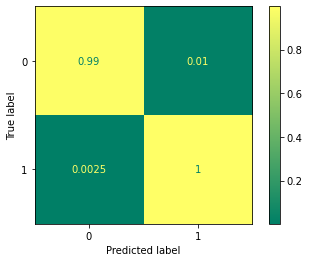

In [22]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(d_out_lgbm_clf, d_out_x_test, d_out_y_test, cmap = 'summer', normalize = "true")

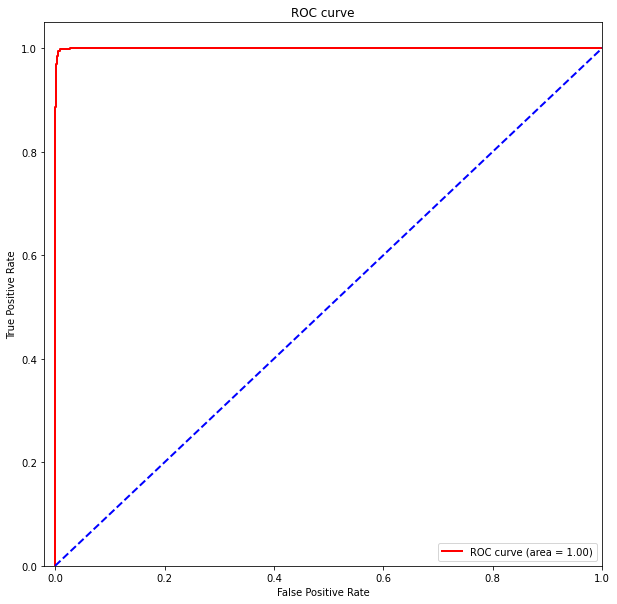

In [24]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(d_out_y_test.values, d_out_lgbm_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

## 6. 최종

In [25]:
def outliers(data):
    Q1, Q3 = np.percentile(data, [25,75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)
    
    return np.where((data > upper_bound) | (data < lower_bound))

In [26]:
def remove_outliers(x, y):
    outlier_index = []
    for col in x.columns:
        outlier_index_tmp = outliers(x[col])[0]
        outlier_index = np.concatenate((outlier_index,outlier_index_tmp),axis=None)

    d_out_index = []
    for i in x.index:
        if i in outlier_index:
            d_out_index.append(i)

    d_out_x = x.loc[d_out_index]
    d_out_x = d_out_x.reset_index(drop=True)
    
    d_out_y = y.loc[d_out_index]
    d_out_y = d_out_y.reset_index(drop=True)
    return d_out_x, d_out_y

In [29]:
std_x_train, std_x_test = scaling(x_train, x_test,'StandScaler()')

In [30]:
f_x_train,f_y_train = remove_outliers(std_x_train, y_train)
f_x_test,f_y_test = remove_outliers(std_x_test, y_test)

In [32]:
lgbm_clf = LGBMClassifier(n_estimators=1000,
                            max_depth=12,
                            min_child_samples=5,
                            min_child_weight=5)
evals = [(f_x_test,f_y_test)]
start = time.time()

# 학습 : 조기중단 수행(100)
lgbm_clf.fit(f_x_train,f_y_train, 
                early_stopping_rounds=100, 
                eval_metric='logloss', 
                eval_set=evals, 
                verbose=True)
                

# 예측
lgbm_pred = lgbm_clf.predict(f_x_test)
lgbm_pred_probs = lgbm_clf.predict_proba(f_x_test)[:, 1]
end = time.time()
print("LGBM 수행 시간: {0:.1f} 초 ".format(end - start)) # 2.3 sec
print('분류 결과 : {0:.1f} '.format(accuracy_score(f_y_test,lgbm_pred)))

# 평가지표 시각화 : 오차행렬
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(f_y_test, lgbm_pred, lgbm_pred_probs)

[1]	valid_0's binary_logloss: 0.644293
[2]	valid_0's binary_logloss: 0.616754
[3]	valid_0's binary_logloss: 0.593443
[4]	valid_0's binary_logloss: 0.573483
[5]	valid_0's binary_logloss: 0.556766
[6]	valid_0's binary_logloss: 0.542329
[7]	valid_0's binary_logloss: 0.529765
[8]	valid_0's binary_logloss: 0.518883
[9]	valid_0's binary_logloss: 0.50957
[10]	valid_0's binary_logloss: 0.501278
[11]	valid_0's binary_logloss: 0.494151
[12]	valid_0's binary_logloss: 0.487634
[13]	valid_0's binary_logloss: 0.481789
[14]	valid_0's binary_logloss: 0.47671
[15]	valid_0's binary_logloss: 0.47205
[16]	valid_0's binary_logloss: 0.467849
[17]	valid_0's binary_logloss: 0.463985
[18]	valid_0's binary_logloss: 0.460903
[19]	valid_0's binary_logloss: 0.457817
[20]	valid_0's binary_logloss: 0.455218
[21]	valid_0's binary_logloss: 0.452488
[22]	valid_0's binary_logloss: 0.450172
[23]	valid_0's binary_logloss: 0.447798
[24]	valid_0's binary_logloss: 0.445709
[25]	valid_0's binary_logloss: 0.443816
[26]	valid_0

[333]	valid_0's binary_logloss: 0.278784
[334]	valid_0's binary_logloss: 0.278327
[335]	valid_0's binary_logloss: 0.277866
[336]	valid_0's binary_logloss: 0.27753
[337]	valid_0's binary_logloss: 0.277215
[338]	valid_0's binary_logloss: 0.276887
[339]	valid_0's binary_logloss: 0.276548
[340]	valid_0's binary_logloss: 0.276217
[341]	valid_0's binary_logloss: 0.275868
[342]	valid_0's binary_logloss: 0.275613
[343]	valid_0's binary_logloss: 0.275267
[344]	valid_0's binary_logloss: 0.274961
[345]	valid_0's binary_logloss: 0.274659
[346]	valid_0's binary_logloss: 0.274466
[347]	valid_0's binary_logloss: 0.274211
[348]	valid_0's binary_logloss: 0.273809
[349]	valid_0's binary_logloss: 0.273579
[350]	valid_0's binary_logloss: 0.273217
[351]	valid_0's binary_logloss: 0.272816
[352]	valid_0's binary_logloss: 0.272537
[353]	valid_0's binary_logloss: 0.272103
[354]	valid_0's binary_logloss: 0.271821
[355]	valid_0's binary_logloss: 0.271525
[356]	valid_0's binary_logloss: 0.271188
[357]	valid_0's b

[700]	valid_0's binary_logloss: 0.182452
[701]	valid_0's binary_logloss: 0.182133
[702]	valid_0's binary_logloss: 0.181878
[703]	valid_0's binary_logloss: 0.181714
[704]	valid_0's binary_logloss: 0.181502
[705]	valid_0's binary_logloss: 0.181285
[706]	valid_0's binary_logloss: 0.181064
[707]	valid_0's binary_logloss: 0.180838
[708]	valid_0's binary_logloss: 0.180517
[709]	valid_0's binary_logloss: 0.180255
[710]	valid_0's binary_logloss: 0.179997
[711]	valid_0's binary_logloss: 0.179785
[712]	valid_0's binary_logloss: 0.17955
[713]	valid_0's binary_logloss: 0.179303
[714]	valid_0's binary_logloss: 0.179077
[715]	valid_0's binary_logloss: 0.178841
[716]	valid_0's binary_logloss: 0.178605
[717]	valid_0's binary_logloss: 0.178488
[718]	valid_0's binary_logloss: 0.178261
[719]	valid_0's binary_logloss: 0.178156
[720]	valid_0's binary_logloss: 0.177859
[721]	valid_0's binary_logloss: 0.1777
[722]	valid_0's binary_logloss: 0.177468
[723]	valid_0's binary_logloss: 0.177159
[724]	valid_0's bin

LGBM 수행 시간: 1.3 초 
분류 결과 : 1.0 
오차 행렬
[[3423   34]
 [   9 2417]]
정확도: 0.9927, 정밀도: 0.9861, 재현율: 0.9963,F1: 0.9912, AUC:0.9996


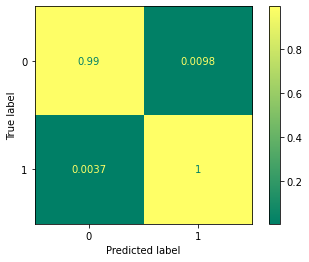

In [33]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lgbm_clf, f_x_test, f_y_test, cmap = 'summer', normalize = "true")

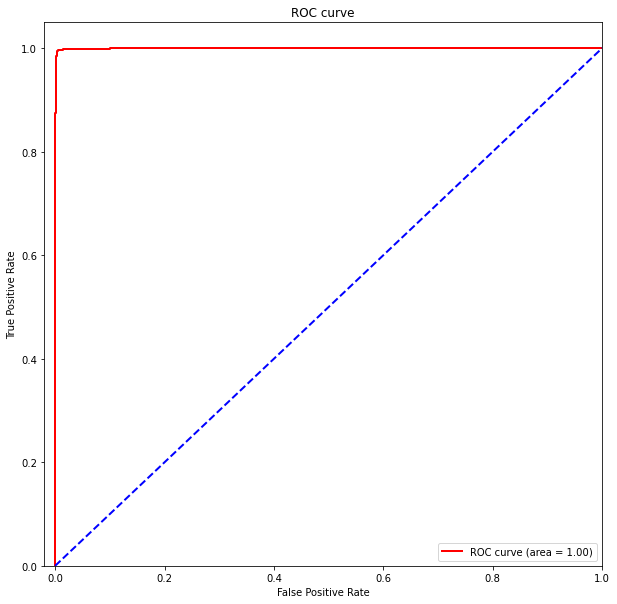

In [34]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(f_y_test.values, lgbm_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

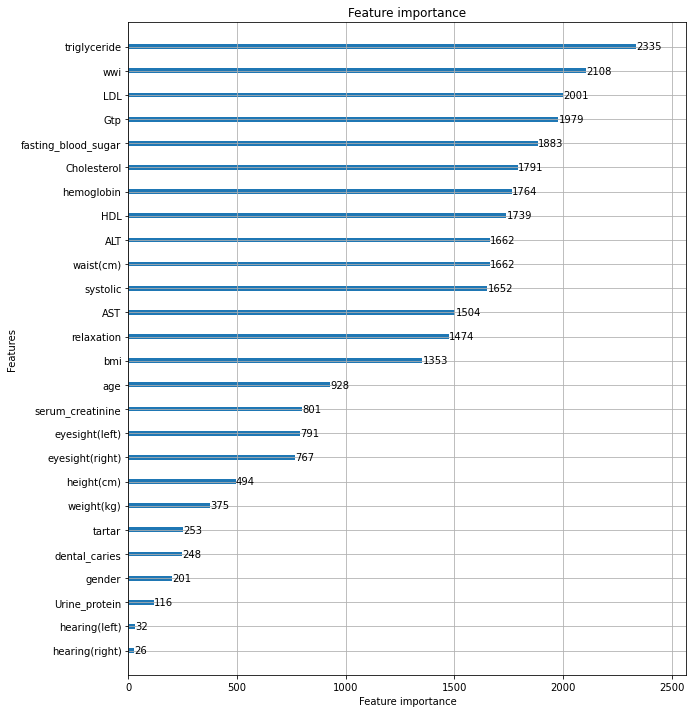

In [35]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_clf, ax=ax,importance_type='split')